# Технологии искусственного интеллекта. Анализ данных

© Петров М.В., старший преподаватель кафедры киберфотоники, Самарский университет

План:
1. Библиотека Pandas. Визуализация данных
2. Задачи классификации. Метрики качества. Классификация *kNN*
3. Деревья решений
4. Линейная регрессия. Метрики качества
5. Градиентный бустинг
6. **[TBA]**

## Лекция 1. Библиотека Pandas. Визуализация данных

### Содержание

1. [Введение](#1.1-Введение)
2. [Pandas](#1.2-Pandas)
3. [Предобработка данных](#1.3-Предобработка-данных)
4. [Визуализация данных](#1.4-Визуализация-данных)
5. [Датасет](#1.5-Датасет)
6. [Предобработка данных датасета](#1.6-Предобработка-данных-датасета)
7. [Интерактивный график в `matplotlib`](#1.7-Интерактивный-график-в-matplotlib)
8. [Интерактивный график в `plotly`](#1.8-Интерактивный-график-в-plotly)
9. [Построение графиков средствами `pandas`](#1.9-Построение-графиков-средствами-`pandas`)
10. [Построение графиков в `seaborn`](#1.10-Построение-графиков-в-seaborn)
11. [Построение различных графиков](#1.11-Построение-различных-графиков)
12. [Экспорт в растровый и векторный форматы](#1.12-Экспорт-в-растровый-и-векторный-форматы)
13. [`plotly` `Dash`](#1.13-plotly-Dash)

### 1.1 Введение

Что потребуется:
- [Python 3](https://www.python.org/)
- Библиотеки:
  - [NumPy](https://numpy.org/)
  - [SciPy](https://scipy.org/)
  - [Pandas](https://pandas.pydata.org/)
  - [Matplotlib](https://matplotlib.org/)
  - [Plotly](https://plotly.com/python/)
  - [Scikit-learn](https://scikit-learn.org/stable/)
  - [CatBoost](https://catboost.ai/)
  - [Jupyter Notebook или JupyterLab](https://jupyter.org/)
  - [kagglehub](https://pypi.org/project/kagglehub/)
- Настроенная IDE

Подробнее:
- [Установка Python. Менеджеры пакетов. Виртуальное окружение. Настройка IDE](../../self-study/python_stuff.md).

### 1.2 Pandas
`pandas` &ndash; это высокоуровневая Python библиотека для работы с табличными данными.

Гайды:
- [pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)
- [pandas API reference](https://pandas.pydata.org/docs/reference/index.html)
- [Открытый курс машинного обучения. Тема 1. Первичный анализ данных с Pandas](https://habr.com/company/ods/blog/322626/)

In [1]:
!python -V

Python 3.14.3


In [2]:
import pandas as pd
pd.__version__

'3.0.0'

In [3]:
from pathlib import Path
# путь к папке с данными
data_path = "data"
# Чтение данных из csv-файла
# датасет: Goodreads Books - 31 Features: https://www.kaggle.com/datasets/austinreese/goodreads-books
data = pd.read_csv(Path(data_path, 'goodreads_books.csv'))
type(data)

pandas.DataFrame

> [DataFrame](https://pandas.pydata.org/docs/reference/frame.html) - Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Скачивание датасета с использованием `kagglehub`:

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/goodreads-books")

print("Path to dataset files:", path)

In [5]:
# возвращает первые n строк, n=5 по-умолчанию
data.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,...,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,...,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,...,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,...,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,...,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


[Pandas options and settings](https://pandas.pydata.org/pandas-docs/stable/reference/options.html):  
- `display.max_columnsint`  
    If max_cols is exceeded, switch to truncate view. Depending on large_repr, objects are either centrally truncated or printed as a summary view. ‘None’ value means unlimited.  
    In case python/IPython is running in a terminal and large_repr equals ‘truncate’ this can be set to 0 or None and pandas will auto-detect the width of the terminal and print a truncated object which fits the screen width. The IPython notebook, IPython qtconsole, or IDLE do not run in a terminal and hence it is not possible to do correct auto-detection and defaults to 20.

In [6]:
# вывод всех столбцов датафрейма - None
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,Inner Circle,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,2255,1290,518,93,23,400.0,October 29th 2006,Thomas Nelson,NaN,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,Take Two,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,Reliquary,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,The Millionaire Next Door: The Surprising Secr...,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


In [8]:
# размерностть
data.shape

(52199, 31)

In [9]:
# информация о данных в DataFrame, тип данных признаков
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  str    
 2   link                    52199 non-null  str    
 3   series                  23319 non-null  str    
 4   cover_link              51592 non-null  str    
 5   author                  52199 non-null  str    
 6   author_link             52199 non-null  str    
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null  int64  
 

In [10]:
# статистика по числовым признакам
data.describe()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages
count,5.219900e+04,5.219900e+04,52199.000000,52199.000000,5.219900e+04,5.219900e+04,52199.000000,52199.000000,52199.000000,49869.000000
mean,1.015443e+07,1.887361e+04,1012.980881,4.020610,7.817176e+03,6.250785e+03,3456.512424,935.496600,413.640051,328.942730
std,1.164443e+07,1.163978e+05,4054.802421,0.367161,5.876373e+04,3.473533e+04,18249.298631,5890.077215,3843.356500,252.790119
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.628190e+05,3.400000e+02,31.000000,3.820000,1.170000e+02,1.090000e+02,63.000000,15.000000,6.000000,210.000000
50%,6.383537e+06,2.295000e+03,163.000000,4.030000,8.100000e+02,7.650000e+02,452.000000,107.000000,36.000000,304.000000
75%,1.738060e+07,9.297500e+03,622.000000,4.230000,3.375500e+03,3.190500e+03,1866.000000,450.000000,151.000000,392.000000
max,5.444299e+07,6.801077e+06,169511.000000,5.000000,4.414877e+06,1.868421e+06,980183.000000,529060.000000,537793.000000,14777.000000


In [11]:
# убираем колонки в датафрейме по названию, изменяем состояние объекта - inplace=True
data.drop(columns=['settings', 'amazon_redirect_link', 'worldcat_redirect_link', 
                   'recommended_books', 'books_in_series', 'description', 'asin',
                   'link', 'author_link', 'cover_link','original_title'], inplace=True)

In [12]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  52199 non-null  int64  
 1   title               52199 non-null  str    
 2   series              23319 non-null  str    
 3   author              52199 non-null  str    
 4   rating_count        52199 non-null  int64  
 5   review_count        52199 non-null  int64  
 6   average_rating      52199 non-null  float64
 7   five_star_ratings   52199 non-null  int64  
 8   four_star_ratings   52199 non-null  int64  
 9   three_star_ratings  52199 non-null  int64  
 10  two_star_ratings    52199 non-null  int64  
 11  one_star_ratings    52199 non-null  int64  
 12  number_of_pages     49869 non-null  float64
 13  date_published      51339 non-null  str    
 14  publisher           48563 non-null  str    
 15  genre_and_votes     49359 non-null  str    
 16  isbn           

In [13]:
data.describe()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages
count,5.219900e+04,5.219900e+04,52199.000000,52199.000000,5.219900e+04,5.219900e+04,52199.000000,52199.000000,52199.000000,49869.000000
mean,1.015443e+07,1.887361e+04,1012.980881,4.020610,7.817176e+03,6.250785e+03,3456.512424,935.496600,413.640051,328.942730
std,1.164443e+07,1.163978e+05,4054.802421,0.367161,5.876373e+04,3.473533e+04,18249.298631,5890.077215,3843.356500,252.790119
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.628190e+05,3.400000e+02,31.000000,3.820000,1.170000e+02,1.090000e+02,63.000000,15.000000,6.000000,210.000000
50%,6.383537e+06,2.295000e+03,163.000000,4.030000,8.100000e+02,7.650000e+02,452.000000,107.000000,36.000000,304.000000
75%,1.738060e+07,9.297500e+03,622.000000,4.230000,3.375500e+03,3.190500e+03,1866.000000,450.000000,151.000000,392.000000
max,5.444299e+07,6.801077e+06,169511.000000,5.000000,4.414877e+06,1.868421e+06,980183.000000,529060.000000,537793.000000,14777.000000


In [14]:
# вывод данных колонки `title`
data['title']

0                                             Inner Circle
1                                        A Time to Embrace
2                                                 Take Two
3                                                Reliquary
4        The Millionaire Next Door: The Surprising Secr...
                               ...                        
52194                               The Stranger I Married
52195       The Opposite of Loneliness: Essays and Stories
52196                                    Sadako will leben
52197                                          Confessions
52198                        Going Rogue: An American Life
Name: title, Length: 52199, dtype: str

In [15]:
type(data['title'])

pandas.Series

> [Series](https://pandas.pydata.org/docs/reference/series.html) - One-dimensional ndarray with axis labels (including time series).

In [16]:
data['title'].head(3)

0         Inner Circle
1    A Time to Embrace
2             Take Two
Name: title, dtype: str

#### Индексация

In [17]:
# срез с указанием признаков
data.loc[200:204, ['title', 'five_star_ratings']]

,title,five_star_ratings
200,This is Falling,3923
201,When My Name Was Keoko,1955
202,Farewell to Manzanar: A True Story of Japanese...,2379
203,Kissing Sin,6263
204,Havemercy,670


In [18]:
# срез numpy-like
data.iloc[200:204, 0:3]

,id,title,series
200,22756190,This is Falling,(Falling #1)
201,613218,When My Name Was Keoko,NaN
202,649361,Farewell to Manzanar: A True Story of Japanese...,NaN
203,74043,Kissing Sin,(Riley Jenson Guardian #2)


In [19]:
# фильтрация данных - маска
data['five_star_ratings'] > 2500

0         True
1        False
2         True
3         True
4         True
         ...  
52194     True
52195     True
52196    False
52197     True
52198    False
Name: five_star_ratings, Length: 52199, dtype: bool

In [20]:
# фильтрация данных по булевой маске
data[data['five_star_ratings'] > 2500]

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,isbn,isbn13,characters,awards
0,630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN
2,6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,NaN
3,39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,"Aloysius X.L. Pendergast, Margo Green, William...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,Independent Publisher Book Award (IPPY) Nomine...
5,311164,Black Sheep,NaN,Georgette Heyer,9538,775,4.05,3298,3831,2042,304,63,252.0,March 1st 1966,Arrow,"Romance 550, Historical-Historical Fiction 316...",0099468034,9780099468035,"Abigail Wendover, Miles Calverleigh",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52192,15727731,Beauty Awakened,(Angels of the Dark #2),Gena Showalter,11894,793,4.15,5227,4031,2032,453,151,447.0,February 26th 2013,HQN Books,"Romance-Paranormal Romance 405, Fantasy-Parano...",0373777434,9780373777433,"Koldo, Nicola Lane",NaN
52193,1395807,Blue Heaven,NaN,C.J. Box,11284,1096,4.01,3656,4752,2346,423,107,352.0,2007,Minotaur Books,"Mystery 198, Fiction 110, Thriller 96, Suspens...",0312365705,9780312365707,"Monica Taylor, Annie Taylor, Fiona Pritzle, To...",Edgar Award for Best Novel (2009)
52194,15743072,The Stranger I Married,NaN,Sylvia Day,13295,805,3.87,4220,4733,3116,848,378,312.0,2007,Kensington Trade,"Romance-Historical Romance 335, Romance 312, H...",075829039X,9780758290397,"Gerard Faulkner, Isabel Pelham",NaN
52195,18143905,The Opposite of Loneliness: Essays and Stories,NaN,Marina Keegan,42609,4282,3.84,12461,15191,11202,3011,744,208.0,April 8th 2014,Scribner,"Nonfiction 1307, Short Stories 766, Writing-Es...",147675361X,9781476753614,NaN,"Goodreads Choice Award for Nonfiction (2014), ..."


In [21]:
type(data[data['five_star_ratings'] > 2500])

pandas.DataFrame

In [22]:
data[data['five_star_ratings'] > 2500]['number_of_pages'].mean()

np.float64(360.23779152171113)

In [23]:
data[data['five_star_ratings'] > 3500]['number_of_pages'].mean()

np.float64(365.10797158642464)

In [24]:
data['date_published']

0         January 1st 2007
1        October 29th 2006
2         January 1st 2009
3                     1997
4        October 28th 1995
               ...        
52194                 2007
52195       April 8th 2014
52196                 1961
52197      April 24th 2007
52198     January 1st 2009
Name: date_published, Length: 52199, dtype: str

In [25]:
data[data['date_published'].str.len() == 3]

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,isbn,isbn13,characters,awards
2606,7123161,"The Arabian Nights: Tales of 1001 Nights, Volu...",NaN,"testing testing, Malcolm C. Lyons, Ursula Lyon...",2942,108,4.05,1156,1029,565,131,61,982.0,800,Penguin Classics,"Classics 147, Fiction 73, Fantasy 56, Short St...",0140449388,9780140449389,"Shahryar, Scheherazade",NaN
3835,1072113,The HarperCollins Study Bible: Fully Revised &...,NaN,"Anonymous, Wayne A. Meeks, Harold W. Attridge,...",784,48,4.37,457,208,83,21,15,2208.0,393,HarperOne,"Religion 51, Religion-Christianity 17, Christi...",0060786841,9780060786847,NaN,NaN
4878,80084,Cupid and Psyche,NaN,"Apuleius, Edward John Kenney",2310,120,4.11,892,888,444,73,13,256.0,170,Cambridge University Press,"Classics 90, Fantasy-Mythology 28, Fiction 22,...",0521278139,9780521278133,NaN,NaN
5848,731140,Eusebius: The Church History,NaN,Paul L. Maier,3553,223,4.00,1309,1199,828,165,52,416.0,324,Kregel Academic & Professional,"History 376, Religion 128, Church-Church Histo...",0825433282,9780825433283,"IrenÃ¦us, Heraclas, Dionysius the Areopagite, ...",NaN
8272,9699011,Organon,NaN,"Aristotle, Giorgio Colli",210,18,4.00,81,63,53,12,1,1066.0,-40,Adelphi,"Philosophy 61, Classics 6, Philosophy-Logic 5,...",884591755X,9788845917554,NaN,NaN
8753,7495363,Ø§ÙØ³ÙØ±Ø© Ø§ÙÙØ¨ÙÙØ©,NaN,"Ø§Ø¨Ù ÙØ´Ø§Ù , Ù ØµØ·ÙÙ Ø§ÙØ³ÙØ§",1078,54,4.53,755,198,81,24,20,1109.0,833,Ø¯Ø§Ø± Ø§ÙÙ Ø¹Ø±ÙØ©,"Religion 22, Religion-Islam 16, History 12",NaN,NaN,NaN,NaN
10679,199707,Holy Bible: The Greek New Testament,NaN,"Anonymous, Barbara Aland, Kurt Aland, B.M. Met...",1806,69,4.54,1267,335,146,35,23,918.0,382,Hendrickso,"Reference 76, Religion 48, Religion-Theology 29",1598561715,9781598561715,NaN,NaN
12120,400299,Somnium Scipionis: The Dream of Scipio (Studen...,NaN,"Marcus Tullius Cicero, Gilbert Lawall",111,9,4.02,38,42,26,5,0,96.0,-51,Addison Wesley Publishing Company,"Philosophy 5, History 3",0582367514,9780582367517,NaN,NaN
12227,6403740,ÙØ±Ø¢Ù,NaN,"Anonymous, Ø­Ø³ÛÙ Ù Ø­ÛâØ§ÙØ¯ÛÙ Ø§ÙÙ...",56834,3053,4.35,41251,4562,4582,2582,3857,800.0,650,NaN,"Religion 1301, Religion-Islam 473, Nonfiction ...",NaN,NaN,"Moses (Bible), Jesus, Mary (mother of Jesus), ...",NaN
12256,12406749,ÙØ±Ø¢Ù Ú©Ø±ÛÙ,NaN,"Anonymous, Ø¹ÙÛ Ù ÙØ³ÙÛ Ú¯Ø±Ù Ø§Ø±ÙØ¯Û",56836,3053,4.35,41252,4562,4582,2582,3858,NaN,650,NaN,"Religion 1301, Religion-Islam 473, Nonfiction ...",NaN,NaN,"Moses (Bible), Jesus, Mary (mother of Jesus), ...",NaN


In [26]:
len(data[data['date_published'].str.len() == 3])

50

In [27]:
df = data[data['date_published'].str.len() > 3]

In [28]:
df.info()

<class 'pandas.DataFrame'>
Index: 51279 entries, 0 to 52198
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  51279 non-null  int64  
 1   title               51279 non-null  str    
 2   series              23051 non-null  str    
 3   author              51279 non-null  str    
 4   rating_count        51279 non-null  int64  
 5   review_count        51279 non-null  int64  
 6   average_rating      51279 non-null  float64
 7   five_star_ratings   51279 non-null  int64  
 8   four_star_ratings   51279 non-null  int64  
 9   three_star_ratings  51279 non-null  int64  
 10  two_star_ratings    51279 non-null  int64  
 11  one_star_ratings    51279 non-null  int64  
 12  number_of_pages     49615 non-null  float64
 13  date_published      51279 non-null  str    
 14  publisher           48330 non-null  str    
 15  genre_and_votes     48647 non-null  str    
 16  isbn                

In [29]:
type(df['date_published'])

pandas.Series

In [30]:
df['date_published']

0         January 1st 2007
1        October 29th 2006
2         January 1st 2009
3                     1997
4        October 28th 1995
               ...        
52194                 2007
52195       April 8th 2014
52196                 1961
52197      April 24th 2007
52198     January 1st 2009
Name: date_published, Length: 51279, dtype: str

In [31]:
df['date_published'].str.extract(r'(\d{4})')

,0
0,2007
1,2006
2,2009
3,1997
4,1995
...,...
52194,2007
52195,2014
52196,1961
52197,2007


> Хороший интерактивный ресурс для отладки регулярных выражений: [Regex 101](https://regex101.com/).

In [32]:
df['year_published'] = df['date_published'].str.extract(r'(\d{4})')

In [33]:
df['year_published']

0        2007
1        2006
2        2009
3        1997
4        1995
         ... 
52194    2007
52195    2014
52196    1961
52197    2007
52198    2009
Name: year_published, Length: 51279, dtype: str

In [34]:
type(df['date_published'].str.extract(r'(\d{4})'))

pandas.DataFrame

In [35]:
type(df['year_published'])

pandas.Series

In [36]:
# 1D numpy массив
df['year_published'] = df['date_published'].str.extract(r'(\d{4})').to_numpy().flatten()

In [37]:
df['year_published']

0        2007
1        2006
2        2009
3        1997
4        1995
         ... 
52194    2007
52195    2014
52196    1961
52197    2007
52198    2009
Name: year_published, Length: 51279, dtype: str

In [38]:
df['year_published'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
52194    False
52195    False
52196    False
52197    False
52198    False
Name: year_published, Length: 51279, dtype: bool

In [39]:
df[df['year_published'].isna()]

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,isbn,isbn13,characters,awards,year_published
163,901111,Tanakh: The Holy Scriptures,NaN,"Anonymous, Jewish Publication Society",2736,100,4.38,1684,598,319,85,50,1624.0,-450,The Jewish Publication Society,"Religion 129, Religion-Judaism 72, Literature-...",0827603665,9780827603660,NaN,NaN,NaN
255,534289,The I Ching or Book of Changes,NaN,"Anonymous, Richard Wilhelm, Cary F. Baynes, C....",17694,352,4.19,8676,4991,3076,698,253,740.0,-850,Princeton University Press,"Philosophy 420, Religion 164, Nonfiction 154, ...",069109750X,9780691097503,NaN,NaN,NaN
475,18008226,Nathaniel's 1st Adventure,(Cosmic Aviators #1),G.E.F. Neilson,42,22,4.33,28,5,6,1,2,332.0,June 14th 1,Buzzword Press,"Childrens 1user, Childrens-Middle Grade 1user,...",NaN,NaN,NaN,NaN,NaN
512,23277468,World Peace: The Voice of a Mountain Bird,NaN,"Amit Ray, Banani Ray",107,9,4.62,79,21,4,0,3,164.0,September 9th 214,Inner Light Publishers,"Inspirational 14, Spirituality 9, Self Help 8,...",NaN,NaN,NaN,NaN,NaN
736,27297,The Analects,NaN,"Confucius, D.C. Lau",17045,660,3.83,5329,5555,4470,1299,392,249.0,-429,Penguin Books Ltd,"Philosophy 1445, Classics 469, Nonfiction 378,...",0140443487,9780140443486,NaN,J. A. Hollon palkinto (2015),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49659,159964,The Dhammapada,NaN,"Anonymous, Ananda Maitreya, Thich Nhat Hanh",22062,887,4.28,11751,6167,3136,682,326,114.0,January 30th -400,Parallax Press,"Religion-Buddhism 571, Religion 519, Philosoph...",0938077872,9780938077879,NaN,NaN,NaN
49706,380609,The Bacchae,NaN,"Euripides, Kenneth McLeish, Frederic Raphael",13823,634,3.89,4356,4876,3504,858,229,96.0,-405,Nick Hern Books,"Plays 669, Classics 639, Drama 262, Fantasy-My...",1854594117,9781854594112,"Dionysus (mythology), Pentheus, Cadmus (mythol...",NaN,NaN
49746,4934651,Fe Fi FOE Comes,NaN,William C. Samples,19,8,4.37,11,5,2,1,0,869.0,May 25th 201,Vel North Editions,Philosophy 2,098006810X,9780980068108,NaN,NaN,NaN
49888,821535,The Torah: The Five Books of Moses,NaN,"Anonymous, Harry M. Orlinsky",1587,100,4.18,895,308,224,93,67,394.0,-400,The Jewish Publication Society,"Religion 128, Religion-Judaism 30, Philosophy ...",0827600151,9780827600157,NaN,NaN,NaN


In [40]:
df[df['year_published'].isna()].index

Index([  163,   255,   475,   512,   736,  2692,  3397,  4726,  5335,  5719,
        5973,  6115,  6462,  6909,  7208,  7508,  8340,  8826,  9226, 10806,
       12068, 12484, 12549, 12764, 14486, 14565, 15712, 16012, 16038, 16634,
       17160, 17896, 19630, 21406, 21473, 25820, 26070, 26879, 28973, 31663,
       32484, 32791, 33071, 34517, 34624, 35620, 36093, 36277, 36449, 37004,
       37078, 37432, 38494, 41070, 41572, 41751, 41918, 42036, 42154, 42194,
       42319, 42447, 42457, 42517, 42812, 43039, 43055, 43095, 43779, 43793,
       43883, 44323, 44734, 45027, 45488, 45545, 45676, 46013, 46480, 47804,
       48251, 48630, 49272, 49323, 49659, 49706, 49746, 49888, 52138],
      dtype='int64')

In [41]:
df = df.drop(df[df['year_published'].isna()].index)

In [42]:
df.info()

<class 'pandas.DataFrame'>
Index: 51190 entries, 0 to 52198
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  51190 non-null  int64  
 1   title               51190 non-null  str    
 2   series              23034 non-null  str    
 3   author              51190 non-null  str    
 4   rating_count        51190 non-null  int64  
 5   review_count        51190 non-null  int64  
 6   average_rating      51190 non-null  float64
 7   five_star_ratings   51190 non-null  int64  
 8   four_star_ratings   51190 non-null  int64  
 9   three_star_ratings  51190 non-null  int64  
 10  two_star_ratings    51190 non-null  int64  
 11  one_star_ratings    51190 non-null  int64  
 12  number_of_pages     49530 non-null  float64
 13  date_published      51190 non-null  str    
 14  publisher           48246 non-null  str    
 15  genre_and_votes     48562 non-null  str    
 16  isbn                

In [43]:
df['year_published'] = df['year_published'].astype(int)

In [44]:
df.info()

<class 'pandas.DataFrame'>
Index: 51190 entries, 0 to 52198
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  51190 non-null  int64  
 1   title               51190 non-null  str    
 2   series              23034 non-null  str    
 3   author              51190 non-null  str    
 4   rating_count        51190 non-null  int64  
 5   review_count        51190 non-null  int64  
 6   average_rating      51190 non-null  float64
 7   five_star_ratings   51190 non-null  int64  
 8   four_star_ratings   51190 non-null  int64  
 9   three_star_ratings  51190 non-null  int64  
 10  two_star_ratings    51190 non-null  int64  
 11  one_star_ratings    51190 non-null  int64  
 12  number_of_pages     49530 non-null  float64
 13  date_published      51190 non-null  str    
 14  publisher           48246 non-null  str    
 15  genre_and_votes     48562 non-null  str    
 16  isbn                

#### Группировка данных

[GroupBy](https://pandas.pydata.org/docs/reference/groupby.html).

In [45]:
dfgby = df.groupby('year_published')

In [46]:
type(dfgby)

pandas.api.typing.DataFrameGroupBy

In [47]:
len(dfgby)

449

In [48]:
for year, sub_df in dfgby:
    if year == 2009:
        print(sub_df)

            id                                              title  \
2      6050894                                           Take Two   
35     6419887  The Boy Who Harnessed the Wind: Creating Curre...   
58     5498077                                  Code of the Clans   
66     6556261                                      Hell's Heroes   
97     3942622                                The Immortal Hunter   
...        ...                                                ...   
52079  4010795                                           Take One   
52088  7145565                                   Flaskepost fra P   
52127  6566616                                    Crocodile Tears   
52153  4067103                                    Ransom My Heart   
52198  6922622                      Going Rogue: An American Life   

                           series                                     author  \
2             (Above the Line #2)                            Karen Kingsbury   
35         

In [49]:
dfgby['three_star_ratings'].mean()

year_published
1000      98.000000
1001      58.000000
1002    1241.000000
1008    2858.500000
1010     343.000000
           ...     
2017    2486.990654
2018    2477.068063
2019    1557.872564
2020     711.016393
2021       2.600000
Name: three_star_ratings, Length: 449, dtype: float64

In [50]:
import numpy as np
dfgby['five_star_ratings'].apply(np.sum, axis=0)

year_published
1000       1316
1001        144
1002       4348
1008       5634
1010       2777
         ...   
2017    6936643
2018    5733865
2019    2571860
2020     369304
2021         87
Name: five_star_ratings, Length: 449, dtype: int64

#### Иерархические индексы (MultiIndex)
Иерархические индексы позволяют организовать несколько (два и более) уровней индексирования по одной оси. Другими словави, это способ работать с многомерными данными, представив их в форме с меньшей размерностью.

In [51]:
# сгенерируем series с multiindex
data = pd.Series(np.random.randn(10),
    index= [ ['a', 'a', 'a', 'b', 'b', 'b', 'с', 'с', 'd', 'd'],
             [1, 2, 3, 1, 2, 3, 1, 2, 2, 3] ]
)
data

a  1    1.114952
   2    1.872394
   3    0.313204
b  1   -1.070585
   2    0.624340
   3   -0.082719
с  1    0.361708
   2   -1.316166
d  2   -0.006245
   3    0.713007
dtype: float64

In [52]:
# сгенерируем dataframe с multiindex
data = pd.DataFrame(np.random.randn(10,2),
    index= [ ['a', 'a', 'a', 'b', 'b', 'b', 'с', 'с', 'd', 'd'],
             [1, 2, 3, 1, 2, 3, 1, 2, 2, 3] ]
)
data

0         1
a 1 -0.476155 -1.333408
  2 -0.105909 -0.399623
  3 -2.001905 -0.987710
b 1 -0.144916  2.349490
  2  0.844438  0.976337
  3 -0.279256  0.185899
с 1 -1.656225  0.116298
  2 -0.966712  1.982518
d 2  2.238353  0.073845
  3  0.937371  0.769788

In [53]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('с', 1),
            ('с', 2),
            ('d', 2),
            ('d', 3)],
           )

In [54]:
# доступ по частичному значению индекса
data.loc['a']

,0,1
1,-0.476155,-1.333408
2,-0.105909,-0.399623
3,-2.001905,-0.987710


In [55]:
# доступ по полному значению индекса
data.loc[('a', 1)]

0   -0.476155
1   -1.333408
Name: (a, 1), dtype: float64

In [56]:
# Можно даже сразу получить значение поля
data.loc[('a', 1), 1]

np.float64(-1.3334078866931938)

### 1.3 Предобработка данных

Предобработка данных &ndash; это предварительный этап работы с данными, цель которого &ndash; "почистить" данные от ненужного или дополнить их. Может включать в себя центрирование, нормализацию, сдвиг, вращение, обрезку.

#### Виды проблем в данных

- **Неполные данные**  
  Заказчик выслал не все данные, в них есть пропуски, нет данных за определённый период, есть данные только для части задач. Например, есть рейсы только одной авиакомпании, есть суммы покупок с января по март и с июня по декабрь.
- **Грязные данные**  
   - данные в плохом или разном формате;
   - в данных есть мусор, например, смешиваются русские и английские буквы, данные в виде шифра;
   - разные меры данных, например, часть в метрах, часть в футах;
   - данные старые, значения признака перемешиваются.
- **Плохая разметка**
   - в данных есть ошибки;
   - разная оценка данных из-за человеческого фактора;
   - разметка не соответствует реальности;
   - размеченных данных очень много &ndash; должна быть «золотая середина».
  
> Чем лучше хотите получить разметку данных, тем больше времени придётся потратить.  

- **Данные с утечкой**  
  В данных нужно избегать признаков, от которых явно зависит целевая переменная. Такая ситуация приводит к тому, что во время обучения модель всё предсказывает, но в боевых условиях бесполезна.

#### Работа с пропусками

**Пропуски** &ndash; отсутствие значений в данных. Обычно это случается из-за ошибок человека:
- забыли, какие данные не внесли;
- не всё перенесли из другого документа;
- неверно заполнили документ;
- случайно удалили часть данных.

Например, при опросе респонденты отвечали только на часть вопросов, не указывая какие-то данные.

##### Что делать с пропусками?

- **Удалить пропуски**: удалить строки с пропусками, если таких строк немного, или столбцы (признаки) в данных, если их много, и это не повлияет на результат в целом.
- **Заменить пропуски**: заменить на среднее значение (медианой) или на самый часто попадающийся вариант. Например, опрос респондентов проходил в Москве, вероятнее, большинство &ndash; жители города, а не туристы. Значит, в графе город можно поставить «Москва». Или же по другим данным в документе можно восстановить пол людей, которые его не указали.
- **Записать новое значение**: например, вместо пропуска в столбце «Пол» указать «не определён».
- **Заменить алгоритмами МО**: признак можно считать целевой переменной и обучать модель, чтобы предсказать пропущенные значения.

#### Нормализация признаков
Некоторые алгоритмы чувствительны к масштабу признаков: если масштаб разный &ndash; алгоритмы хуже сходятся к оптимальным значениям. Один из способов обработки данных &ndash; **нормализация** &ndash; процесс приведения данных к одному масштабу, обеспечивает лучшие условия выборки, изменения, удаления данных.

Базовые методы нормализации:  

- **MinMax** нормализация &ndash; приведение данных к масштабу $[0, 1]$.
- **Стандартная** нормализация &ndash; данные имеют среднее $0$ и стандартное отклонение $1$.

Иногда данные лучше удалить, если они не несут пользы. Например, столбец считался по ошибке и содержит мусор, или признак не имеет полезной информации, или столбец содержит всегда одинаковое значение.

#### Преобразование признаков, имеющих не нормальное распредление

Один из способов визуализации &ndash; **гистограмма** &ndash; вид диаграммы, показывающий данные в форме столбцов. Демонстрирует распределение данных по выборке внутри столбца и значений в признаке. Позволяет увидеть проблемы или некорректные значения в данных, преобразовать их в наглядную форму и распределить, чтобы облегчить работу.

**Графики Q-Q (квантиль-квантиль)** сравнивают два распределения вероятностей путем построения совместных квантилей. График Q-Q используется для сравнения форм распределений, обеспечивая графическое представление того, насколько подобны или различны положение, масштаб и асимметрия двух распределений.

Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные. Один из способов сделать данные «нормальными» &ndash; взять **логарифм**. При этом не должно быть значений, равных $0$, иначе метод `np.log` выдаст бесконечность.  
Если значения всё-таки начинаются с $0$, то перед тем, как взять логарифм, можно прибавить к данным $1$.  
Другой способ &ndash; взять квадратный корень от данных.

#### Скореллированные признаки

**Correlation plot** &ndash; корреляционный график. Признаки в данных могут иметь сильную корреляцию, то есть линейную зависимость. Если зависимость большая, признаки несут избыточную информацию, поэтому скореллированные признаки лучше удалять.

#### Поиск выбросов (outliers)

**Выброс** &ndash; результат измерения, который выделяется из общей выборки. Выбросы появляются из-за ошибок в данных и сильно выделяются среди остальных значений. Их нужно искать и удалять, иначе данные будут подстраиваться под них и давать неверный результат.

Как искать выбросы:  
- **Поиск и удаление по порогу**  
  Способ нахождения выбросов, основанный на здравом смысле и методе пристального взгляда. Посмотреть на данные и поискать невозможные и/или нелогичные значения, например, в столбце «высота здания» стоит $30$ км.  
- **Поиск с помощью статистики**  
  Поиск с помощью здравого смысла трудно автоматизировать, поэтому эффективнее статистические методы. Например, поиск по отклонению или по распределению $IQR$ (interquartile range, межквартильное расстояние).  
- **Поиск с помощью DBSCAN**  
  Поиск с помощью методов кластеризации, один из таких методов &ndash; DBSCAN, который может автоматически находить шум в данных.

Разные способы поиска выбросов могут давать разные результаты. Не всегда выделяющееся значение будет являться выбросом, возможно, у нас пока просто не хватает данных.

#### Создание новых признаков &ndash; feature engineering

**Feature Engineering** &ndash; способ создания признаков, техника решения задач МО, которая увеличивает качество разрабатываемых алгоритмов. Превращает специфичные данные в понятные для модели векторы.

Способы:  
- **Ручное создание признаков**  
  Новые признаки можно создавать на основе имеющихся, если понятно, что означает тот или иной признак. Техника может значительно улучшить модель, но требуется погружение в предметную область. Например, зная массу и рост человека, можно посчитать индекс массы тела; зная координаты места нарушения ПДД и центра города, можно посчитать расстояние между ними.
- **Полиномиальные признаки**  
  Например, попарное перемножение имеющихся столбцов, чтобы получить нелинейные комбинации признаков. Другой пример &ndash; возведение признаков в квадрат или корень из признака, чтобы получить искусственные признаки.  
- **Dummy-переменные**    
  Между категориальными признаками не всегда есть порядок, поэтому их следует заменять на dummy-переменные, в виде цифр, чтобы алгоритм подумал, что в данных есть порядок.  
  > Например, лев, тигр, медведь лучше записать как $0$, $1$, $2$. Расстояние между «лев» и «тигр» равно $1$, а между «лев» и «медведь» &ndash; $2$, хотя это не так. Решение &ndash; создать новые признаки по количеству категорий. Для признака «лев» значение будет $1$, если это лев, иначе $0$. Теперь расстояния между всеми признаками равны $1$.
- **Работа с датой/временем**  
  Обычно дата &ndash; это строка, похожая на «2005-06-02». В таком виде признак имеет мало смысла, но его можно разделить на набор других признаков. Модель не принимает текст, поэтому заменяем его на набор других числовых признаков. Например, день, месяц, год или день недели, праздник/выходной.  
- **Статистики по наборам признаков**  
  Если в данных есть признаки, описывающие значение в разные моменты времени, то они могут быть полезными. Например, зарплата_2016, зарплата_2017, зарплата_2018. Отсюда можно вытащить среднюю зарплату за $3$ года, медианную зарплату, динамику зарплаты, максимальную и минимальную зарплату.

### 1.4 Визуализация данных

Библиотеки

- [matplotlib](https://matplotlib.org/)  
    Python-библиотека для визуализации данных.
- [seaborn](https://seaborn.pydata.org/index.html)  
    Библиотека для создания статистических графиков на Python. Она основывается на `matplotlib` и тесно взаимодействует со структурами данных `pandas`.
- [plotly](https://plotly.com/python/)  
   Библиотека для визуализации данных.
   - Фреймворк [Dash](https://dash.plotly.com/).

Гайды по `matplotlib`:
- [Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)
- [Examples](https://matplotlib.org/stable/gallery/index.html)
- [Interactive Plotting in IPython](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)
- [Enable interactive mode - matplotlib.pyplot.ion](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ion.html)

Гайды по `seaborn`:
- [Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

Гайды по `plotly`:
- [Шпаргалка по визуализации данных в Python с помощью Plotly @ Хабр](https://habr.com/ru/articles/502958/)
- [Забудьте о matplotlib: визуализация данных в Python вместе с plotly @ proglib](https://proglib.io/p/plotly)
- [Визуализация данных с помощью Python Dash @ Хабр](https://habr.com/ru/companies/otus/articles/716190/)

Гайды по `pandas`:
- [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Гайды:
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/ru/company/ods/blog/323210/)

### 1.5 Датасет

[Goodreads Books - 31 Features](https://www.kaggle.com/datasets/austinreese/goodreads-books)

| Признак                | Описание                                                                                                    |
|------------------------|-------------------------------------------------------------------------------------------------------------|
| id                     | id книги                                                                                                    |
| title                  | Название книги                                                                                              |
| link                   | Ссылка на Goodreads                                                                                         |
| series                 | Название цикла, если книга является частью многоциколового произведения                                     |
| cover_link             | Ссылка на обложку книги                                                                                     |
| author                 | Список авторов книжного произведения                                                                        |
| author_link            | Ссылка на запись об авторах книжного произведения                                                           |
| rating_count           | Количество выставленных оценок на книжное произведение                                                      |
| review_count           | Количество оставленных отзывов на книжное произведение                                                      |
| average_rating         | Средняя оценка книжного произведения                                                                        |
| five_star_ratings      | Количество выставленных оценок на книжное произведение "5 звезд"                                            |
| four_star_ratings      | Количество выставленных оценок на книжное произведение "4 звезды"                                           |
| three_star_ratings     | Количество выставленных оценок на книжное произведение "3 звезды"                                           |
| two_star_ratings       | Количество выставленных оценок на книжное произведение "2 звезды"                                           |
| one_star_ratings       | Количество выставленных оценок на книжное произведение "1 звезда"                                           |
| number_of_pages        | Количество страниц в книжном произведении                                                                   |
| date_published         | Дата выхода книги в печатном издании                                                                        |
| publisher              | Название издательства                                                                                       |
| original_title         | Исходное название книги                                                                                     |
| genre_and_votes        | Список указанных пользователями жанров в виде <жанр1 N1>, <жанр2 N2>, где N1, N2 &ndash; количество "меток" |
| isbn                   | ISBN номер книжного произведения                                                                            |
| isbn13                 | 13-тизначный ISBN номер книжного произведения                                                               |
| asin                   | Amazon Standard Identification Number &ndash; артикул на площадке Amazon                                    |
| settings               | Место (или несколько), в котором происходят описываемые в книге события                                     |
| characters             | Имена основных персонажей в книге                                                                           |
| awards                 | Список названий присужденных книжному произведению премий (наград)                                          |
| amazon_redirect_link   | URL ссылка редиректа на площадку Amazon                                                                     |
| worldcat_redirect_link | URL ссылка редиректа на Goodread's WorldCat                                                                 |
| recommended_books      | Список id рекомендуемых книг с Goodreads                                                                    |
| books_in_series        | Список id книг, входящих в одноименный цикл                                                                 |
| description            | Синопсис                                                                                                    |

In [57]:
import pandas as pd
import numpy as np
from pathlib import Path
# путь к папке с данными
data_path = "../lecture_1/data"
# датасет: Goodreads Books - 31 Features: https://www.kaggle.com/datasets/austinreese/goodreads-books
df = pd.read_csv(Path(data_path, 'goodreads_books.csv'))
df.info()
df.head(10)

<class 'pandas.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  str    
 2   link                    52199 non-null  str    
 3   series                  23319 non-null  str    
 4   cover_link              51592 non-null  str    
 5   author                  52199 non-null  str    
 6   author_link             52199 non-null  str    
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null  int64  
 

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,Inner Circle,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,2255,1290,518,93,23,400.0,October 29th 2006,Thomas Nelson,NaN,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,Take Two,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,Reliquary,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,The Millionaire Next Door: The Surprising Secr...,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...
5,311164,Black Sheep,https://www.goodreads.com//book/show/311164.Bl...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Georgette Heyer,https://www.goodreads.com/author/show/18067.Ge...,9538,775,4.05,3298,3831,2042,304,63,252.0,March 1st 1966,Arrow,Black Sheep,"Romance 550, Historical-Historical Fiction 316...",009946803

### 1.6 Предобработка данных датасета
#### Дропаем ненужные очевидные признаки

Уберем из датафрейма следующие признаки:
- `link`: ссылка на Goodreads
- `cover_link`: ссылка на обложку книги
- `author_link`: ссылка на запись об авторах книжного произведения
- `original_title`: исходное название книги
- `isbn`: ISBN номер книжного произведения
- `isbn13`: 13-тизначный ISBN номер книжного произведения
- `asin`: Amazon Standard Identification Number &ndash; артикул на площадке Amazon
- `amazon_redirect_link`: URL ссылка редиректа на площадку Amazon
- `worldcat_redirect_link`: URL ссылка редиректа на Goodread's WorldCat
- `recommended_books`: список id рекомендуемых книг с Goodreads 

#### Парсим год выхода

##### Избавимся от NaN

In [58]:
print(f"{df[df['date_published'].isna()].shape[0]} out of {df['date_published'].shape[0]} is NaN")

860 out of 52199 is NaN


In [59]:
df.drop(df[df['date_published'].isna()].index, inplace=True)
df['date_published'].shape[0]

51339

In [60]:
df['date_published'].head(10)

0     January 1st 2007
1    October 29th 2006
2     January 1st 2009
3                 1997
4    October 28th 1995
5       March 1st 1966
6                 1957
7                 1980
8       July 14th 1960
9        November 1924
Name: date_published, dtype: str

##### Добавим признак `Год выхода` и спарсим год из даты

In [61]:
# см. https://regex101.com/
df.loc[:, 'year_published'] = df['date_published'].str.extract(r'(\d{4})').to_numpy().flatten()
df.drop(df[df['year_published'].isna()].index, inplace=True)
df['year_published'] = df['year_published'].astype(int)
# дропаем дату выхода
df.drop(columns=['date_published'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 51190 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      51190 non-null  int64  
 1   title                   51190 non-null  str    
 2   link                    51190 non-null  str    
 3   series                  23034 non-null  str    
 4   cover_link              50757 non-null  str    
 5   author                  51190 non-null  str    
 6   author_link             51190 non-null  str    
 7   rating_count            51190 non-null  int64  
 8   review_count            51190 non-null  int64  
 9   average_rating          51190 non-null  float64
 10  five_star_ratings       51190 non-null  int64  
 11  four_star_ratings       51190 non-null  int64  
 12  three_star_ratings      51190 non-null  int64  
 13  two_star_ratings        51190 non-null  int64  
 14  one_star_ratings        51190 non-null  int64  
 15  n

#### Удаляем скобки в столбце `series`

In [62]:
df.series.head(10)

0            (Private #5)
1      (Timeless Love #2)
2     (Above the Line #2)
3         (Pendergast #2)
4                     NaN
5                     NaN
6                     NaN
7                     NaN
8           (AstÃ©rix #1)
9    (Winnie-the-Pooh #3)
Name: series, dtype: str

In [63]:
df['series'] = df['series'].str.strip('()')
df.series.head(10)

0            Private #5
1      Timeless Love #2
2     Above the Line #2
3         Pendergast #2
4                   NaN
5                   NaN
6                   NaN
7                   NaN
8           AstÃ©rix #1
9    Winnie-the-Pooh #3
Name: series, dtype: str

Отделим порядковый номер книги в книжном издании `#N` от самого названия цикла.

In [64]:
df['series'].str.extract(r'( *#\d+ *)')

,0
0,#5
1,#2
2,#2
3,#2
4,NaN
...,...
52194,NaN
52195,NaN
52196,NaN
52197,#4


In [65]:
# сначала проверим результат замены с regexp'ом
df['series'].str.replace(r'( *#\d+ *)', '', regex=True)

0               Private
1         Timeless Love
2        Above the Line
3            Pendergast
4                   NaN
              ...      
52194               NaN
52195               NaN
52196               NaN
52197           Private
52198               NaN
Name: series, Length: 51190, dtype: str

In [66]:
df['series'] = df['series'].str.replace(r'( *#\d+ *)', '', regex=True)
df.series.head(10)

0            Private
1      Timeless Love
2     Above the Line
3         Pendergast
4                NaN
5                NaN
6                NaN
7                NaN
8           AstÃ©rix
9    Winnie-the-Pooh
Name: series, dtype: str

#### Проанализируем `books_in_series`

In [67]:
df.books_in_series.head(10)

0    381489, 381501, 352428, 630103, 1783281, 17832...
1                                               115036
2                           4010795, 40792877, 7306261
3    67035, 39031, 39033, 136637, 136638, 30068, 39...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                                  NaN
8    122439, 122408, 122401, 122421, 122410, 122404...
9                                99107, 776407, 821000
Name: books_in_series, dtype: str

#### Добавим признак `books_in_series_count` &ndash; количество книг в цикле
> Пример того самого *feature engineering*.

In [68]:
df['books_in_series_count'] = [len([idx for idx in x.split(',')])
                               if pd.notna(x)
                               else 0
                               for x in df['books_in_series']]
df['books_in_series_count'] += 1  # не забываем посчитать и саму книгу
df['books_in_series_count'].head(10)

0    11
1     2
2     4
3    11
4     1
5     1
6     1
7     1
8    11
9     4
Name: books_in_series_count, dtype: int64

In [69]:
df.info()

<class 'pandas.DataFrame'>
Index: 51190 entries, 0 to 52198
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      51190 non-null  int64  
 1   title                   51190 non-null  str    
 2   link                    51190 non-null  str    
 3   series                  23034 non-null  str    
 4   cover_link              50757 non-null  str    
 5   author                  51190 non-null  str    
 6   author_link             51190 non-null  str    
 7   rating_count            51190 non-null  int64  
 8   review_count            51190 non-null  int64  
 9   average_rating          51190 non-null  float64
 10  five_star_ratings       51190 non-null  int64  
 11  four_star_ratings       51190 non-null  int64  
 12  three_star_ratings      51190 non-null  int64  
 13  two_star_ratings        51190 non-null  int64  
 14  one_star_ratings        51190 non-null  int64  
 15  n

In [70]:
# количество "серийных" книжных изданий (НЕ серий, а именно книг, входящих в книжные циклы
len(df[df['books_in_series_count'] > 1])

21843

In [71]:
# количество книжных циклов
df['series'].unique().shape

(11590,)

#### Проанализируем `awards`

In [74]:
pd.set_option('display.width', 1000)
df[df.awards.notna()].awards.head(10)

4     Independent Publisher Book Award (IPPY) Nomine...
10    Romantic Times Reviewers' Choice Award (RT Awa...
13    Goodreads Choice Award Nominee for Nonfiction ...
15                                    SFBC Award (1991)
16    International Napoleonic Society Literary Awar...
26    Theakston Old Peculier Crime Novel of the Year...
28    BTBA Best Translated Book Award Nominee for Fi...
30    Romantic Times Reviewers' Choice Award (RT Awa...
31    Mythopoeic Fantasy Award Nominee for Children'...
35    ALA Alex Award (2010), Corine Internationaler ...
Name: awards, dtype: str

In [75]:
df.awards[10]

"Romantic Times Reviewers' Choice Award (RT Award) for Fantasy Adventure (2015), Goodreads Choice Award Nominee for Fantasy (2015)"

Допустим, мы хотим в данном признаке оставить перечисление названий книжных премий без указания года присуждения.

In [76]:
df[df.awards.notna()].awards.str.replace(r' *\(\d+\) *', '', regex=True)

4        Independent Publisher Book Award (IPPY) Nomine...
10       Romantic Times Reviewers' Choice Award (RT Awa...
13           Goodreads Choice Award Nominee for Nonfiction
15                                              SFBC Award
16         International Napoleonic Society Literary Award
                               ...                        
52190    Anthony Award for Best First Novel, Grand Prix...
52191    Barry Award Nominee for Best Novel, Dilys Awar...
52193                           Edgar Award for Best Novel
52195    Goodreads Choice Award for Nonfiction, Waterst...
52196    Austrian National Prize, City of Vienna Juveni...
Name: awards, Length: 10593, dtype: str

In [77]:
df.awards = df.awards.str.replace(r' *\(\d+\) *', '', regex=True)
df[df.awards.notna()].awards.head(10)

4     Independent Publisher Book Award (IPPY) Nomine...
10    Romantic Times Reviewers' Choice Award (RT Awa...
13        Goodreads Choice Award Nominee for Nonfiction
15                                           SFBC Award
16      International Napoleonic Society Literary Award
26    Theakston Old Peculier Crime Novel of the Year...
28    BTBA Best Translated Book Award Nominee for Fi...
30    Romantic Times Reviewers' Choice Award (RT Awa...
31    Mythopoeic Fantasy Award Nominee for Children'...
35    ALA Alex Award, Corine Internationaler Buchpre...
Name: awards, dtype: str

In [78]:
df.awards[10]

"Romantic Times Reviewers' Choice Award (RT Award) for Fantasy Adventure, Goodreads Choice Award Nominee for Fantasy"

#### Добавим признак `awards_count`

In [79]:
df['awards_count'] = [len([idx for idx in x.split(',')])
                      if pd.notna(x)
                      else 0
                      for x in df['awards']]
df[df['awards_count'] > 0]['awards_count'].head(10)

4     1
10    2
13    1
15    1
16    1
26    1
28    3
30    2
31    1
35    2
Name: awards_count, dtype: int64

##### Какая самая титулованная книга?

In [80]:
df.loc[df['awards_count'].idxmax(), ['title', 'awards', 'awards_count']]

title                                            The Hunger Games
awards          Locus Award Nominee for Best Young Adult Book,...
awards_count                                                   40
Name: 41514, dtype: object

#### Проанализируем признак `author`

In [81]:
df['author'].head(10)

0                            Kate Brian, Julian Peploe
1                                      Karen Kingsbury
2                                      Karen Kingsbury
3                       Douglas Preston, Lincoln Child
4                  Thomas J. Stanley, William D. Danko
5                                      Georgette Heyer
6                           Georgette Heyer, Joan Wolf
7                                          Larry Brown
8    RenÃ© Goscinny, Albert Uderzo, Anthea Bell, De...
9                        A.A. Milne, Ernest H. Shepard
Name: author, dtype: str

In [82]:
df['author'][0]

'Kate Brian, Julian Peploe'

Преобразуем строку в массив строк.

In [83]:
df['author'] = [[idx for idx in x.split(',')] for x in df['author']]
df['author'].head(10)

0                         [Kate Brian,  Julian Peploe]
1                                    [Karen Kingsbury]
2                                    [Karen Kingsbury]
3                    [Douglas Preston,  Lincoln Child]
4               [Thomas J. Stanley,  William D. Danko]
5                                    [Georgette Heyer]
6                        [Georgette Heyer,  Joan Wolf]
7                                        [Larry Brown]
8    [RenÃ© Goscinny,  Albert Uderzo,  Anthea Bell,...
9                     [A.A. Milne,  Ernest H. Shepard]
Name: author, dtype: object

In [84]:
df['author'][0]

['Kate Brian', ' Julian Peploe']

#### Проанализируем признак `genre_and_votes`

In [85]:
df.genre_and_votes

0                  Young Adult 161, Mystery 45, Romance 32
1        Christian Fiction 114, Christian 45, Fiction 3...
2          Christian Fiction 174, Christian 81, Fiction 58
3        Thriller 626, Mystery 493, Horror 432, Fiction...
4        Economics-Finance 1162, Nonfiction 910, Busine...
                               ...                        
52194    Romance-Historical Romance 335, Romance 312, H...
52195    Nonfiction 1307, Short Stories 766, Writing-Es...
52196    Fiction 13, Childrens 11, Historical-Historica...
52197              Young Adult 182, Mystery 52, Romance 34
52198    Biography 176, Nonfiction 171, Politics 165, B...
Name: genre_and_votes, Length: 51190, dtype: str

Возможно, информация о количестве проставленных тегов может представлять для нас какой-то интерес. Например, получить популярность того или иного жанра.
> Вдруг какой-нибудь жанр наиболее предпочитаем пользователем, и ему везде "мерещится" наличие элементов этого жанра в прочитанных им произведениях.

Мы же просто уберем количество проставленных тегов.

In [86]:
# тестовая проверка удаления количества проставленных тегов
df.genre_and_votes.str.replace(r'( *\d+ *)', '', regex=True)

0                            Young Adult, Mystery, Romance
1           Christian Fiction, Christian, Fiction, Romance
2                    Christian Fiction, Christian, Fiction
3                       Thriller, Mystery, Horror, Fiction
4        Economics-Finance, Nonfiction, Business, Finan...
                               ...                        
52194    Romance-Historical Romance, Romance, Historica...
52195    Nonfiction, Short Stories, Writing-Essays, Aut...
52196    Fiction, Childrens, Historical-Historical Fict...
52197                        Young Adult, Mystery, Romance
52198    Biography, Nonfiction, Politics, Biography-Aut...
Name: genre_and_votes, Length: 51190, dtype: str

In [87]:
df.genre_and_votes.str.replace(r'(, )', ',', regex=True)

0                    Young Adult 161,Mystery 45,Romance 32
1        Christian Fiction 114,Christian 45,Fiction 33,...
2            Christian Fiction 174,Christian 81,Fiction 58
3          Thriller 626,Mystery 493,Horror 432,Fiction 422
4        Economics-Finance 1162,Nonfiction 910,Business...
                               ...                        
52194    Romance-Historical Romance 335,Romance 312,His...
52195    Nonfiction 1307,Short Stories 766,Writing-Essa...
52196    Fiction 13,Childrens 11,Historical-Historical ...
52197                Young Adult 182,Mystery 52,Romance 34
52198    Biography 176,Nonfiction 171,Politics 165,Biog...
Name: genre_and_votes, Length: 51190, dtype: str

In [88]:
# дропаем NaN и вносим изменения
df.dropna(subset=['genre_and_votes'], inplace = True)
df.genre_and_votes = df.genre_and_votes.str.replace(r'( *\d+ *)', '', regex=True)
df.genre_and_votes = df.genre_and_votes.str.replace(', ', ',')
df.genre_and_votes[8]

'Sequential Art-Comics,Sequential Art-Graphic Novels,Sequential Art-Bande DessinÃ©e,Fiction,Humor,Cultural-France'

Можно заметить, что помимо жанров имеются поджанры. Иерархическую структуру данных этого признака можно отразить в датафрейме путем дублирования данных (с точки зрения основной сущности &ndash; записи о книжном издании): ввести признаки `genre` и `subgenre`, например. И на какой-то стадии обработки и/или анализа данных по жанрам задать MultiIndex `genre` &rarr; `subgenre`.

Нужные нам регулярки для выделения:
- жанра &ndash; все, что идет до разделителя "-": `([\w ]+)(?>-)`
- поджанра &ndash; все, что идет после разделителя "-": `(?<=-)([\w ]+)`

In [89]:
# поджанры
df.genre_and_votes.str.findall(r'(?<=-)([\w ]+)')

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4        [Finance, Personal Finance, Money, Personal De...
                               ...                        
52194    [Historical Romance, Erotica, Historical Fiction]
52195                      [Essays, Memoir, Coming Of Age]
52196                                 [Historical Fiction]
52197                                                   []
52198                              [Autobiography, Memoir]
Name: genre_and_votes, Length: 48562, dtype: object

In [90]:
# жанры
df.genre_and_votes.str.findall(r'([\w ]+)(?>-)')
# см. https://stackoverflow.com/a/74722529

0                                               []
1                                               []
2                                               []
3                                               []
4        [Economics, Finance, Currency, Self Help]
                           ...                    
52194         [Romance, Adult Fiction, Historical]
52195        [Writing, Autobiography, Young Adult]
52196                                 [Historical]
52197                                           []
52198                   [Biography, Autobiography]
Name: genre_and_votes, Length: 48562, dtype: object

> В Python &leq; 3.10 данная конструкция выполнится с ошибкой, так как поддержка некоторых элементов синтаксиса регэкспа добавлена в версии 3.11.
> Подробнее:
> - [Python Regex - Unknown extension "?>" @ StackOverflow](https://stackoverflow.com/questions/74721240/python-regex-unknown-extension/74722529)
> - [Сверхжадные квантификаторы @ Хабр](https://habr.com/ru/articles/55863/)

В случае успеха мы увидим, что регэкспом мы поймали жанры, у которых есть поджанр, но пропустили жанры без поджанра. Возможно, вместо сложного регулярного выражения имеет смысл выполнить двухэтапный сплит: сначала по ",", потом сплит или регулярка по "-".  
После заполнения признаков `genre` и `subgenre` массивами (если у жанра нет поджанра, просто проставим `None`) можно воспользоваться методом [.explode()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).  
Далее осуществим более простой вариант: смешаем жанры и поджанры в одном признаке.

In [91]:
df.genre_and_votes[8]

'Sequential Art-Comics,Sequential Art-Graphic Novels,Sequential Art-Bande DessinÃ©e,Fiction,Humor,Cultural-France'

In [92]:
df.genre_and_votes.str.findall(r'([\w ]+)')[8]

['Sequential Art',
 'Comics',
 'Sequential Art',
 'Graphic Novels',
 'Sequential Art',
 'Bande DessinÃ',
 'e',
 'Fiction',
 'Humor',
 'Cultural',
 'France']

Как видно, такая конструкция выделит все слова с пробелом. Однако, поджанр "Bande DessinÃ©e" превратился в два: 'Bande DessinÃ', 'e'. К тому же мы получили дубли.

In [93]:
df.genre_and_votes = df.genre_and_votes.str.findall(r'([\w ]+)')

Избавимся от дубликатов.

In [94]:
# тестовая проверка
df.genre_and_votes.apply(lambda x: pd.unique(x))

TypeError: unique requires a Series, Index, ExtensionArray, np.ndarray or NumpyExtensionArray got list.

In [95]:
# фикс ворнинга
df.genre_and_votes.apply(lambda x: pd.unique(np.array(x)))

0                          [Young Adult, Mystery, Romance]
1         [Christian Fiction, Christian, Fiction, Romance]
2                  [Christian Fiction, Christian, Fiction]
3                     [Thriller, Mystery, Horror, Fiction]
4        [Economics, Finance, Nonfiction, Business, Per...
                               ...                        
52194    [Romance, Historical Romance, Historical, Adul...
52195    [Nonfiction, Short Stories, Writing, Essays, A...
52196    [Fiction, Childrens, Historical, Historical Fi...
52197                      [Young Adult, Mystery, Romance]
52198    [Biography, Nonfiction, Politics, Autobiograph...
Name: genre_and_votes, Length: 48562, dtype: object

In [96]:
# внесем изменения
df.genre_and_votes = df.genre_and_votes.apply(lambda x: pd.unique(np.array(x)))
df.rename(columns = {'genre_and_votes' : 'genre'}, inplace = True)
df.genre

0                          [Young Adult, Mystery, Romance]
1         [Christian Fiction, Christian, Fiction, Romance]
2                  [Christian Fiction, Christian, Fiction]
3                     [Thriller, Mystery, Horror, Fiction]
4        [Economics, Finance, Nonfiction, Business, Per...
                               ...                        
52194    [Romance, Historical Romance, Historical, Adul...
52195    [Nonfiction, Short Stories, Writing, Essays, A...
52196    [Fiction, Childrens, Historical, Historical Fi...
52197                      [Young Adult, Mystery, Romance]
52198    [Biography, Nonfiction, Politics, Autobiograph...
Name: genre, Length: 48562, dtype: object

### 1.7 Интерактивный график в `matplotlib`
#### Сгруппируем оценки пользователей по годам выхода книжного издания

In [97]:
df_ratings = df.groupby('year_published') \
    .agg({'rating_count' : 'sum',
          'five_star_ratings' : 'sum',
          'four_star_ratings': 'sum',
          'three_star_ratings': 'sum',
          'two_star_ratings': 'sum',
          'one_star_ratings': 'sum'}) \
    .reset_index()
df_ratings.describe()

,year_published,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
count,446.000000,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02
mean,1720.760090,2.197842e+06,9.107610e+05,7.281215e+05,4.021078e+05,1.087547e+05,4.809649e+04
std,247.531332,6.586845e+06,2.762668e+06,2.178132e+06,1.187946e+06,3.294902e+05,1.512385e+05
min,1000.000000,7.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1599.250000,5.066750e+03,1.689500e+03,1.403750e+03,1.058500e+03,3.190000e+02,1.122500e+02
50%,1796.500000,5.987000e+04,2.058500e+04,2.020150e+04,1.462200e+04,3.980500e+03,1.421000e+03
75%,1909.750000,9.759775e+05,3.674650e+05,3.236198e+05,1.861675e+05,5.010150e+04,1.780975e+04
max,2021.000000,5.516730e+07,2.375305e+07,1.820474e+07,9.391810e+06,2.603820e+06,1.285149e+06


#### Ограничим год выхода 1800+

In [98]:
df_ratings = df_ratings[df_ratings.year_published > 1800]
ratings = ['five_star_ratings', 'four_star_ratings',
           'three_star_ratings', 'two_star_ratings',
           'one_star_ratings']

#### Количество оценок переведем в %

In [99]:
# show rating categories as a percentage
for ratings in ratings:
    df_ratings[ratings] = df_ratings[ratings] / df_ratings['rating_count'] * 100
df_ratings = df_ratings.reset_index(drop=True)
df_ratings.head()

,year_published,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
0,1801,940,17.021277,24.042553,34.787234,18.936170,5.212766
1,1802,5201,20.361469,30.321092,30.186503,13.901173,5.229764
2,1804,2728,42.705279,33.944282,16.788856,4.802053,1.759531
3,1806,1570,20.191083,34.076433,30.636943,11.910828,3.184713
4,1807,14940,39.879518,28.929050,20.287818,7.088353,3.815261


#### Импорт библиотек

In [100]:
# magic function - см. Interactive Plotting in IPython
%matplotlib inline
%matplotlib widget
# %matplotlib ipympl
from ipywidgets import *
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from itertools import cycle
# см. https://ipython.readthedocs.io/en/stable/interactive/plotting.html
# Starting with IPython 5.0 and matplotlib 2.0 you can avoid the use of IPython’s specific magic
# and use matplotlib.pyplot.ion()/matplotlib.pyplot.ioff() which have the advantages of working outside of IPython as well.
# plt.ion()

In [101]:
mpl.__version__

'3.10.8'

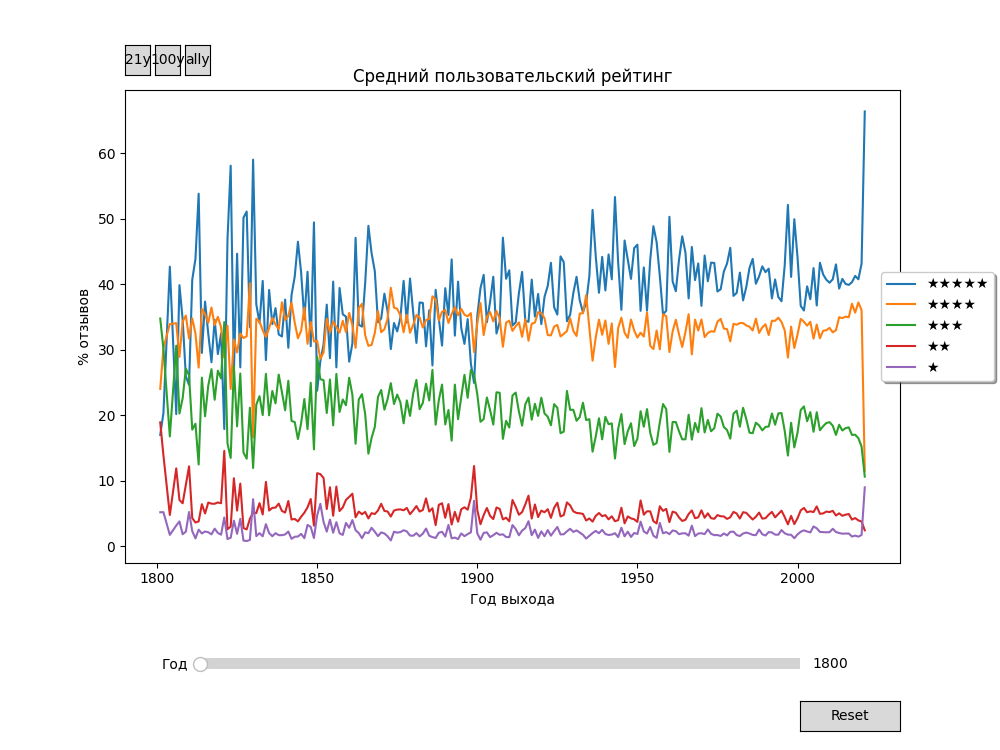

In [105]:
from matplotlib.widgets import Slider, Button
%matplotlib widget

def mpl_iplot():
    fig, ax = plt.subplots(figsize=(10, 7.5))
    r5 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.five_star_ratings), label = '★★★★★')
    r4 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.four_star_ratings), label = '★★★★')
    r3 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.three_star_ratings), label = '★★★')
    r2 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.two_star_ratings), label = '★★')
    r1 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.one_star_ratings), label = '★')
    plt.xlabel("Год выхода")
    plt.ylabel("% отзывов")
    plt.title("Средний пользовательский рейтинг")
    # plt.legend(loc='right', bbox_to_anchor = (1.3, 0.5))
    leg = ax.legend(loc ='right', bbox_to_anchor = (1.13, 0.5), fancybox=True, shadow=True)
    
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(bottom=0.25)
    
    ax_year = fig.add_axes([0.20, 0.1, 0.60, 0.03])
    year_slider = Slider(
        ax=ax_year,
        label='Год',
        valmin=1800,
        valmax=2020,
        valinit=1800,
        valstep = 1,
    )
    
    lines = ax.get_lines()
    lined = {}  # Will map legend lines to original lines.
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(7)  # Enable picking on the legend line.
        lined[legline] = origline
    
    # The function to be called anytime a slider's value changes
    def update(val):
        ax.clear()
        year = year_slider.val
        df_ratings_year = df_ratings[df_ratings.year_published >= year]
        r5 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.five_star_ratings), label = '★★★★★');
        r4 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.four_star_ratings), label = '★★★★');
        r3 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.three_star_ratings), label = '★★★');
        r2 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.two_star_ratings), label = '★★');
        r1 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.one_star_ratings), label = '★');
        leg = ax.legend(loc ='right', bbox_to_anchor = (1.13, 0.5), fancybox=True, shadow=True)
        ax.set_xlabel("Год выхода")
        ax.set_ylabel("% отзывов")
        ax.set_title("Средний пользовательский рейтинг")
    
        lines = ax.get_lines()
        for legline, origline in zip(leg.get_lines(), lines):
            legline.set_picker(7)  # Enable picking on the legend line.
            lined[legline] = origline
    
        fig.canvas.draw_idle()
    
    def on_pick(event):
        # On the pick event, find the original line corresponding to the legend
        # proxy line, and toggle its visibility.
        legline = event.artist
        origline = lined[legline]
        visible = not origline.get_visible()
        origline.set_visible(visible)
        # Change the alpha on the line in the legend, so we can see what lines
        # have been toggled.
        legline.set_alpha(1.0 if visible else 0.2)
        # year_slider.set_cal(year_slider.val)
        fig.canvas.draw()
    
    fig.canvas.mpl_connect('pick_event', on_pick)
    
    
    # register the update function with each slider
    year_slider.on_changed(update)
    
    ax_21y = fig.add_axes([0.125, 0.9, 0.025, 0.04])
    button_21y = Button(ax_21y, '21y', hovercolor='0.975')
    
    ax_100y = fig.add_axes([0.155, 0.9, 0.025, 0.04])
    button_100y = Button(ax_100y, '100y', hovercolor='0.975')
    
    ax_ally = fig.add_axes([0.185, 0.9, 0.025, 0.04])
    button_ally = Button(ax_ally, 'ally', hovercolor='0.975')
    
    def clicked_w(year):
        def clicked(event):
            year_slider.set_val(year)
        return clicked
    
    button_21y.on_clicked(clicked_w(year=2000))
    button_100y.on_clicked(clicked_w(year=1920))
    button_ally.on_clicked(clicked_w(year=1800))
    
    resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    button_reset = Button(resetax, 'Reset', hovercolor='0.975')
    
    def reset(event):
        year_slider.reset()
    button_reset.on_clicked(reset)
    plt.show()
    return fig

ipl = mpl_iplot()

### 1.8 Интерактивный график в `plotly`
#### Для корректного отображения в Jupyter Lab
Deprecated: 
- [Plotly gives an empty field as output in jupyter lab @ StackOverflow](https://stackoverflow.com/a/56777278): 
   ```cmd
   jupyter labextension install @jupyterlab/plotly-extension
   jupyter labextension list
   jupyter lab build
   ```

`jupyter labextension list` по прежнему выводит список расширений:
```cmd
jupyterlab-execute-time           3.1.2
jupyterlab_pygments               0.3.0
jupyterlab_server                 2.27.1
jupyterlab_widgets                3.0.13
```

но устанавливать их следует через менеджер пакетов:
```cmd
pip3 install jupyterlab-execute-time jupyterlab_pygments jupyterlab_server jupyterlab_widgets
```

> After these, restart JupyterLab, and set `plotly.offline.init_notebook_mode(connected=True)` at the start of each notebook session, then `plotly.offline.iplot` should correctly display the plots in the notebook.

#### Импорт библиотек

In [106]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
# import plotly.io as pio
# pio.renderers.default='notebook'

In [107]:
import plotly as py
py.__version__

'6.5.2'

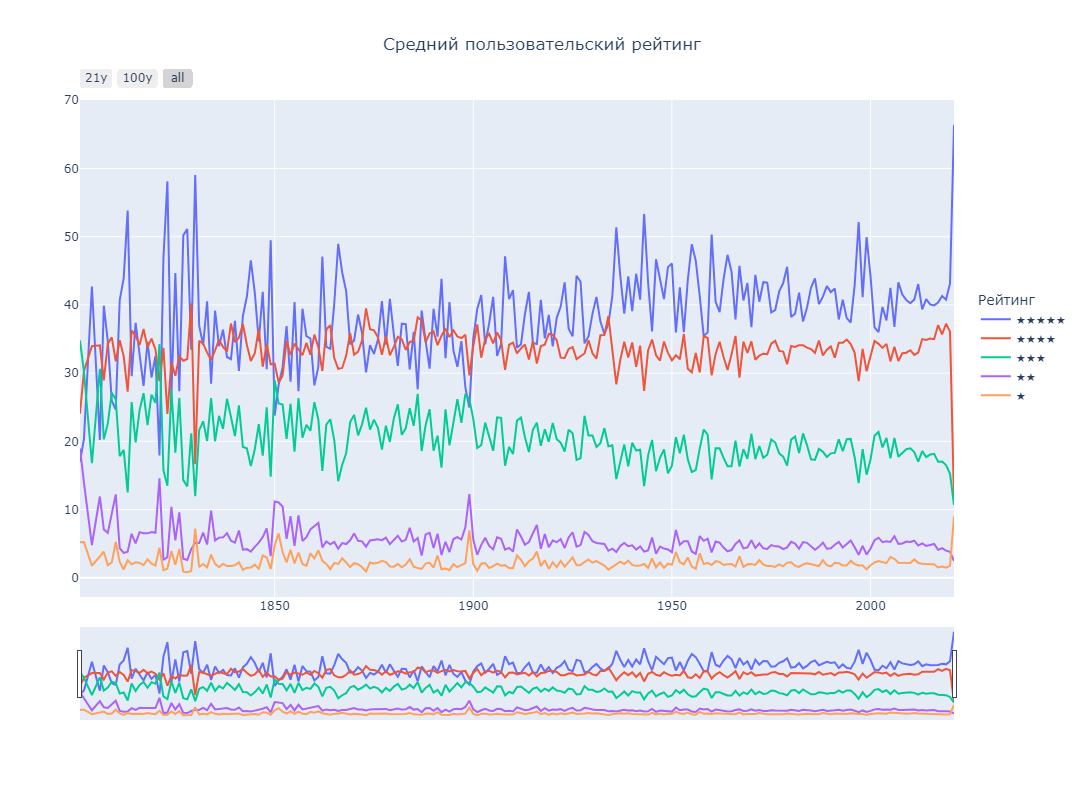

In [108]:
fig_1 = go.Figure()

fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.five_star_ratings), name = '★★★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.four_star_ratings), name = '★★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.three_star_ratings), name = '★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.two_star_ratings),name = '★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.one_star_ratings), name = '★'))

# Set title
fig_1.update_layout(
    title_text="Средний пользовательский рейтинг",
    title_x=0.5,
    legend_title="Рейтинг",
    legend = dict(orientation = "v", y = .5, x = 1.025)
)

# Add range slider
fig_1.update_layout(
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count = 21,
                     label = "21y",
                     step = "year",
                     stepmode = "backward"),
                dict(count = 100,
                     label = "100y",
                     step = "year",
                     stepmode = "backward"),
                dict(step = "all")
            ])
        ),
        rangeslider = dict(
            visible = True
        ),
        type = "date"
    ),
    autosize=False,
    width=1000,
    height=800,
)

fig_1.show()

# 1.9 Построение графиков средствами `pandas`
#### `hist`

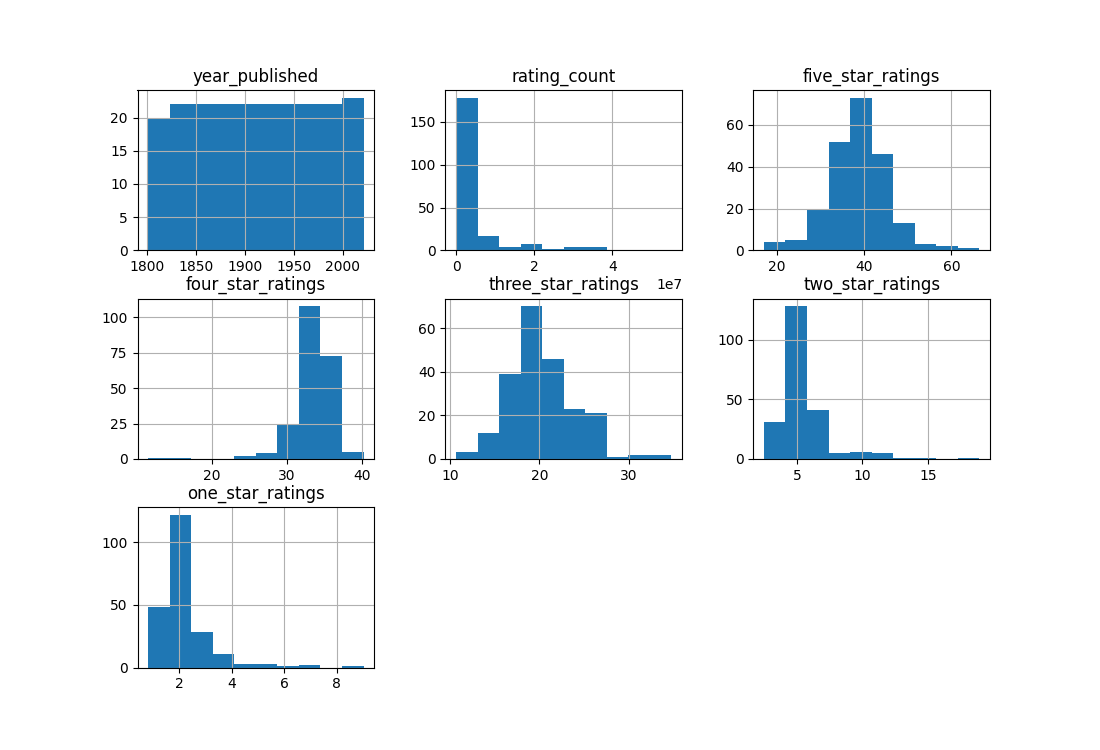

In [109]:
df_ratings.hist(figsize=(11, 7.5));

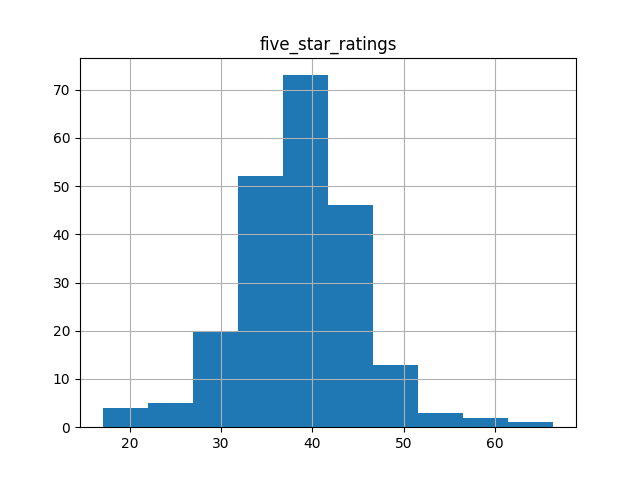

In [110]:
df_ratings.hist(column='five_star_ratings', bins = 10);

### 1.10 Построение графиков в `seaborn`
#### Импорт библиотеки

In [111]:
import seaborn as sns
sns.__version__

'0.13.2'

#### `boxplot`

In [112]:
df_ratings['five_star_ratings']

0      17.021277
1      20.361469
2      42.705279
3      20.191083
4      39.879518
         ...    
214    40.333754
215    41.294209
216    40.775111
217    43.145761
218    66.393443
Name: five_star_ratings, Length: 219, dtype: float64

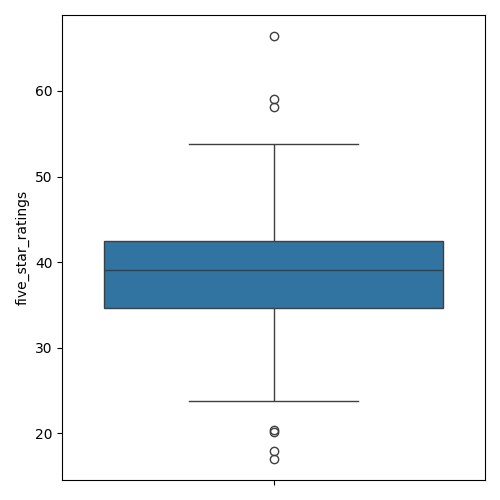

In [113]:
fig_sns, ax_sns = plt.subplots(figsize=(5, 5))
sns.boxplot(ax = ax_sns, data=df_ratings['five_star_ratings']);
fig_sns.tight_layout()
fig_sns.show()

> [Getting Error 0 when plotting boxplot of a filtered dataset](https://stackoverflow.com/a/71423584)

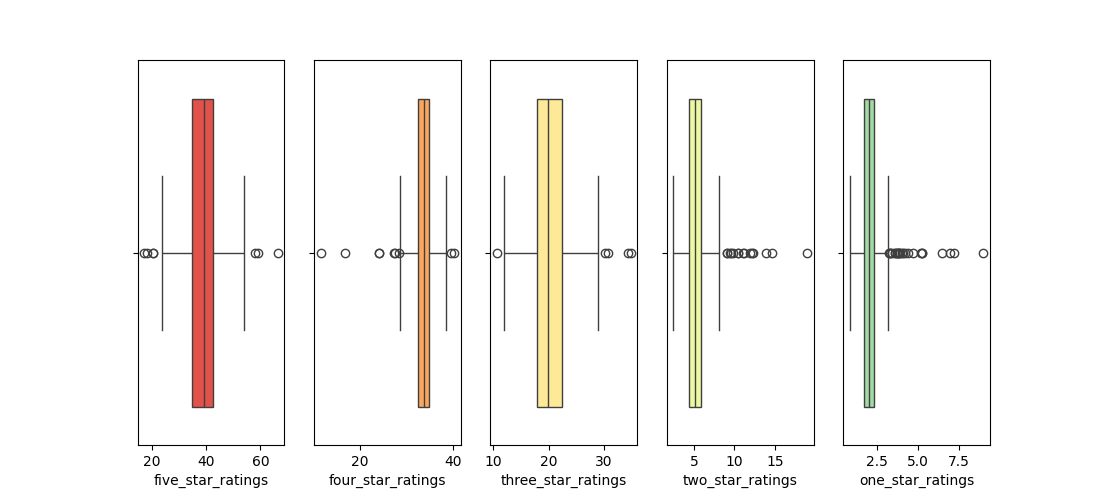

In [114]:
fig_sns, ax_sns = plt.subplots(1, 5, figsize=(11, 5))
sns.boxplot(ax=ax_sns[0], data=df_ratings, x='five_star_ratings');
sns.boxplot(ax=ax_sns[1], data=df_ratings, x='four_star_ratings');
sns.boxplot(ax=ax_sns[2], data=df_ratings, x='three_star_ratings');
sns.boxplot(ax=ax_sns[3], data=df_ratings, x='two_star_ratings');
sns.boxplot(ax=ax_sns[4], data=df_ratings, x='one_star_ratings');
# Пример стайлинга subplot'ов - каждый ящик в свой цвет из палитры
colors = sns.color_palette('Spectral')
cycler = cycle(colors)
for ax in ax_sns:
    for p in ax.patches:
        p.set_facecolor(next(cycler))
plt.show()

#### Ящик с усами
[Wiki](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg" width="66%" title="Python logo"/>
</div>

# 1.11 Построение различных графиков

#### Анализ жанров

In [115]:
genres = df['genre'].explode().value_counts().index.tolist()
genres[:10]

[np.str_('Fiction'),
 np.str_('Fantasy'),
 np.str_('Romance'),
 np.str_('Young Adult'),
 np.str_('Nonfiction'),
 np.str_('Historical'),
 np.str_('Contemporary'),
 np.str_('Historical Fiction'),
 np.str_('Mystery'),
 np.str_('Paranormal')]

In [117]:
type(genres)

list

In [116]:
print(f"Жанров всего: {len(genres)}")

Жанров всего: 1403


Выделим топ-10 жанров и авторов.

In [118]:
auth = df['author'].explode().value_counts().reset_index()
auth = auth[:10]
gen = df['genre'].explode().value_counts().reset_index()
gen = gen[:10]

In [119]:
auth

,author,count
0,Stephen King,94
1,Nora Roberts,94
2,James Patterson,92
3,Agatha Christie,86
4,Erin Hunter,76
5,J.D. Robb,66
6,Meg Cabot,64
7,Terry Pratchett,64
8,Francine Pascal,63
9,Carolyn Keene,59


In [120]:
gen

,genre,count
0,Fiction,24337
1,Fantasy,13058
2,Romance,12397
3,Young Adult,9477
4,Nonfiction,7722
5,Historical,6677
6,Contemporary,6183
7,Historical Fiction,5918
8,Mystery,5830
9,Paranormal,5028


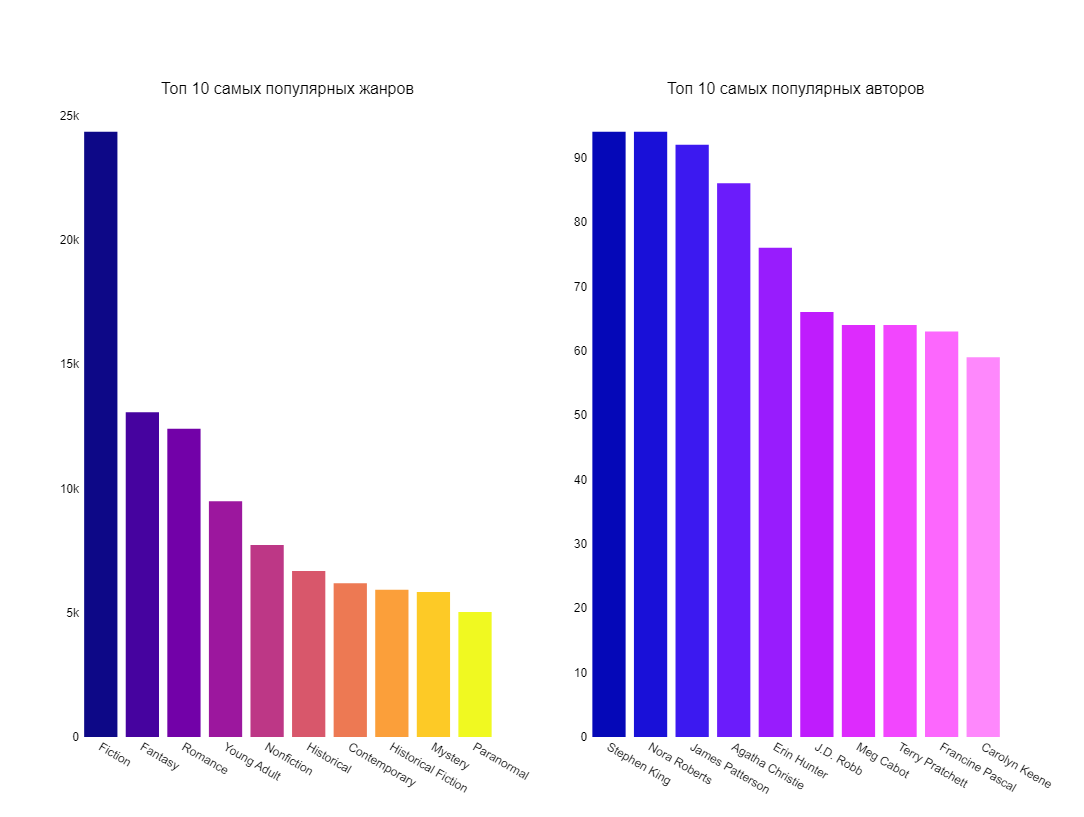

In [121]:
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Топ 10 самых популярных жанров",
                                      "Топ 10 самых популярных авторов"))
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=gen.genre,
                       y=gen['count'],
                       name ='Books',
                       marker_color=px.colors.sequential.Plasma),
                       row=1, col=1)
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=auth.author,
                       y=auth['count'],
                       name ='Books',
                       marker_color=px.colors.sequential.Plotly3),
                       row=1, col=2)
# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_width=0)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False,
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial',
                              size=12,
                              color='black'),
                    autosize=False,
                    width=1100,
                    height=800,)

# Displaying the graph
fig_2.show()

#### Введем искусственный признак - тип серии (цикличность)

In [122]:
di = {1: 'Standalone', 2: 'Duology', 3: 'Trilogy'}
df['series_type'] = df['books_in_series_count'].map(di).fillna('Saga')
df['series_type']

0              Saga
1           Duology
2              Saga
3              Saga
4        Standalone
            ...    
52194    Standalone
52195    Standalone
52196    Standalone
52197          Saga
52198    Standalone
Name: series_type, Length: 48562, dtype: str

#### Распределение по типу серии

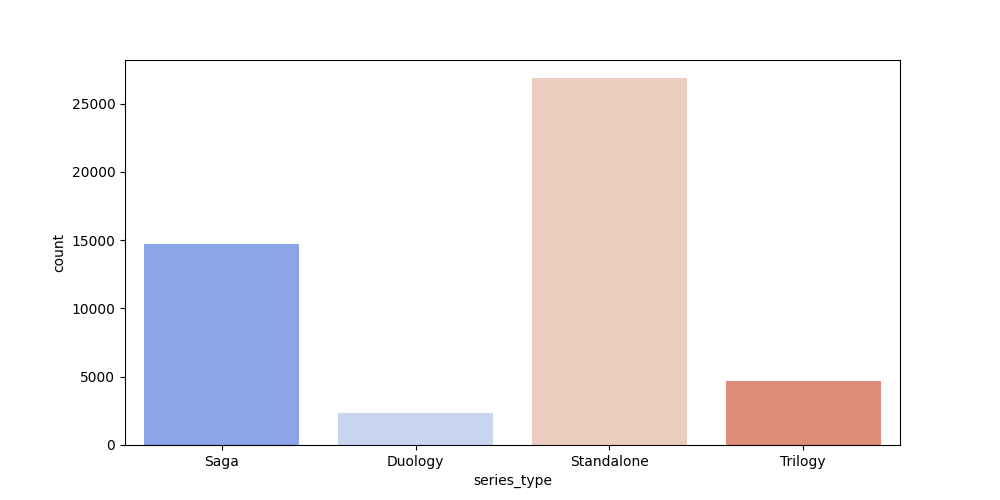

In [124]:
fig_sns, ax_sns = plt.subplots(figsize=(10, 5))
sns.countplot(ax=ax_sns, data=df, x='series_type', hue='series_type', palette='coolwarm');
plt.show()

#### Топ-10 издательств

In [125]:
pubs = df['publisher'].explode().value_counts().index.tolist()
pubs[:10]

['Vintage',
 'HarperCollins',
 'Penguin Books',
 'Ballantine Books',
 'Bantam',
 'Pocket Books',
 'Avon',
 'Berkley',
 'Del Rey',
 'Tor Books']

In [126]:
df['publisher'].value_counts().head(10)

publisher
Vintage             569
HarperCollins       559
Penguin Books       493
Ballantine Books    395
Bantam              373
Pocket Books        318
Avon                307
Berkley             287
Del Rey             287
Tor Books           282
Name: count, dtype: int64

In [127]:
pubs_i = df['publisher'].value_counts().head(10).index
pubs_i

Index(['Vintage', 'HarperCollins', 'Penguin Books', 'Ballantine Books', 'Bantam', 'Pocket Books', 'Avon', 'Berkley', 'Del Rey', 'Tor Books'], dtype='str', name='publisher')

In [128]:
df_pubs = df[df['publisher'].isin(pubs_i)]
df_pubs.info()

<class 'pandas.DataFrame'>
Index: 3870 entries, 3 to 52183
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3870 non-null   int64  
 1   title                   3870 non-null   str    
 2   link                    3870 non-null   str    
 3   series                  2104 non-null   str    
 4   cover_link              3860 non-null   str    
 5   author                  3870 non-null   object 
 6   author_link             3870 non-null   str    
 7   rating_count            3870 non-null   int64  
 8   review_count            3870 non-null   int64  
 9   average_rating          3870 non-null   float64
 10  five_star_ratings       3870 non-null   int64  
 11  four_star_ratings       3870 non-null   int64  
 12  three_star_ratings      3870 non-null   int64  
 13  two_star_ratings        3870 non-null   int64  
 14  one_star_ratings        3870 non-null   int64  
 15  nu

#### Количество книг в топ-10 издательств

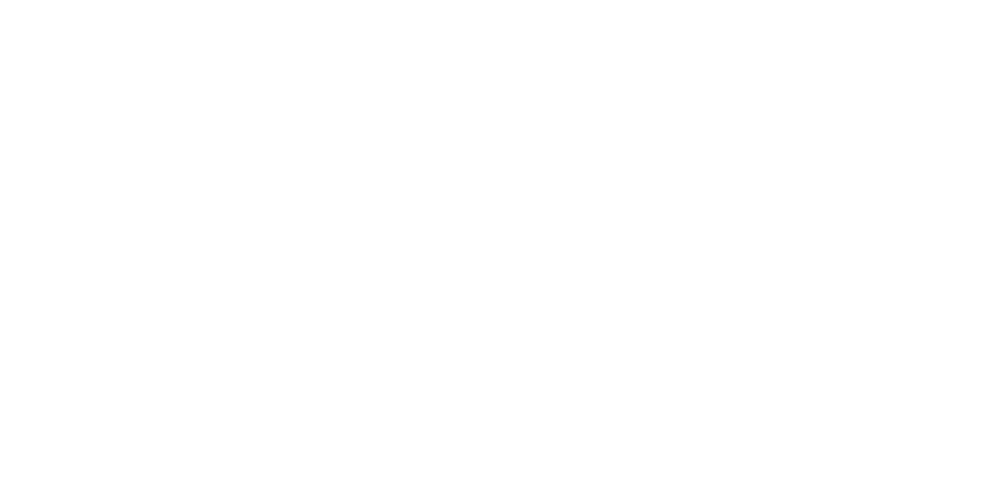

In [130]:
fig_sns, ax_sns = plt.subplots(figsize=(10, 5))
pal = sns.diverging_palette(120, 240, s=100, l=60, center='light', n=df_pubs['publisher'].value_counts().shape[0])
sns.countplot(ax=ax_sns, data=df_pubs, x='publisher', hue='publisher', palette=pal);
ax_sns.tick_params(axis='x', rotation=30)
fig_sns.tight_layout()
plt.show()

#### Количество книг в топ-10 издательств по типу серии

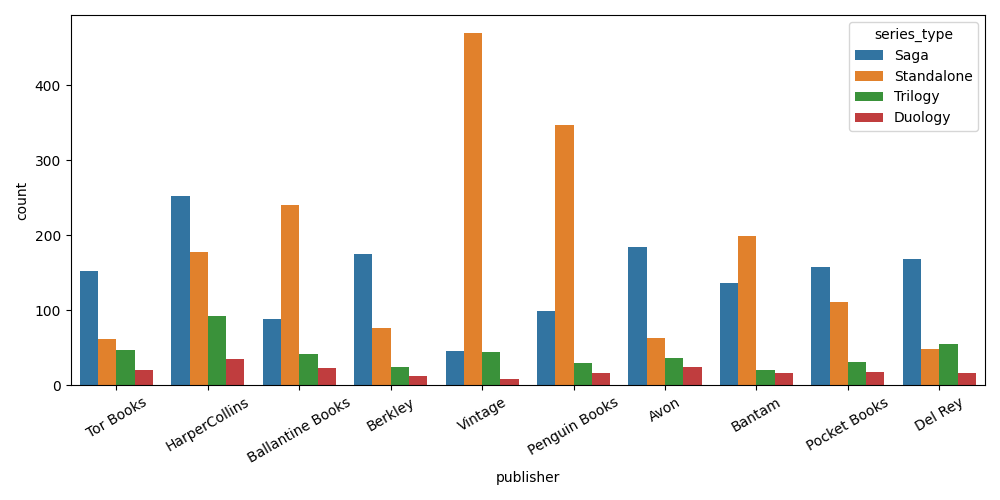

In [131]:
fig_sns, ax_sns = plt.subplots(figsize=(10, 5))
sns.countplot(ax=ax_sns, data=df_pubs, x='publisher', hue='series_type');
ax_sns.tick_params(axis='x', rotation=30)
fig_sns.tight_layout()
plt.show()

#### Топ-10 издательств по количеству оценок в определенном жанре

In [132]:
df_grouped_by_pub = df.groupby('publisher') \
    .agg({'title':'count',
          'average_rating':'mean',
          'rating_count': 'sum'}) \
    .reset_index()

In [133]:
df_pub_popular = df_grouped_by_pub.sort_values(by=['rating_count'], ascending=False)[:10]
df_pub_popular

,publisher,title,average_rating,rating_count
6335,Penguin Books,493,3.955436,25439700
5004,"Little, Brown and Company",177,3.880169,21155025
8740,Vintage,569,3.939789,14314933
7402,Scholastic Press,162,4.085679,14186630
7427,Scribner,165,3.913030,13617858
6357,Penguin Classics,263,3.937452,13457344
846,Bantam,373,3.974129,13307327
824,Ballantine Books,395,3.959747,12543216
3754,HarperCollins,559,4.065081,11690798
3407,Grand Central Publishing,261,3.953946,11158290


In [141]:
def barplot_by_genre(genre):
    mask = [genre in x for x in df['genre']]
    newframe = df[mask]
    df_grouped_by_pub = newframe.groupby('publisher') \
       .agg({'title':'count', 'average_rating':'mean', 'rating_count': 'sum'}) \
       .reset_index()
    df_popular = df_grouped_by_pub.sort_values(by=['rating_count'], ascending=False)[:10]
    barplot = px.bar(data_frame = df_popular,
                     x = 'publisher',
                     y = 'rating_count',
                     labels = {'publisher': 'Издательство', 'rating_count': 'Количество оценок', 'average_rating': 'Рейтинг'},
                     color = 'average_rating',
                     opacity = 0.9,
                     orientation = 'v',
                     barmode = 'relative',
                     title = f"Топ 10 издательств по количеству оценок в жанре \"{genre}\"",
                    )
    barplot.layout.update(autosize=False,
                          width=1000,
                          height=500,
                          title_x = 0.5)
    barplot
    barplot.show()

In [142]:
interact(barplot_by_genre, genre=genres, df = fixed(df));

interactive(children=(Dropdown(description='genre', options=(np.str_('Fiction'), np.str_('Fantasy'), np.str_('…

[[0.73647059 0.08       0.10117647 1.        ]
 [0.88133795 0.17700884 0.14925029 1.        ]
 [0.96585928 0.34340638 0.24405998 1.        ]
 [0.9867128  0.51164937 0.38615917 1.        ]
 [0.98823529 0.67154171 0.56053825 1.        ]]


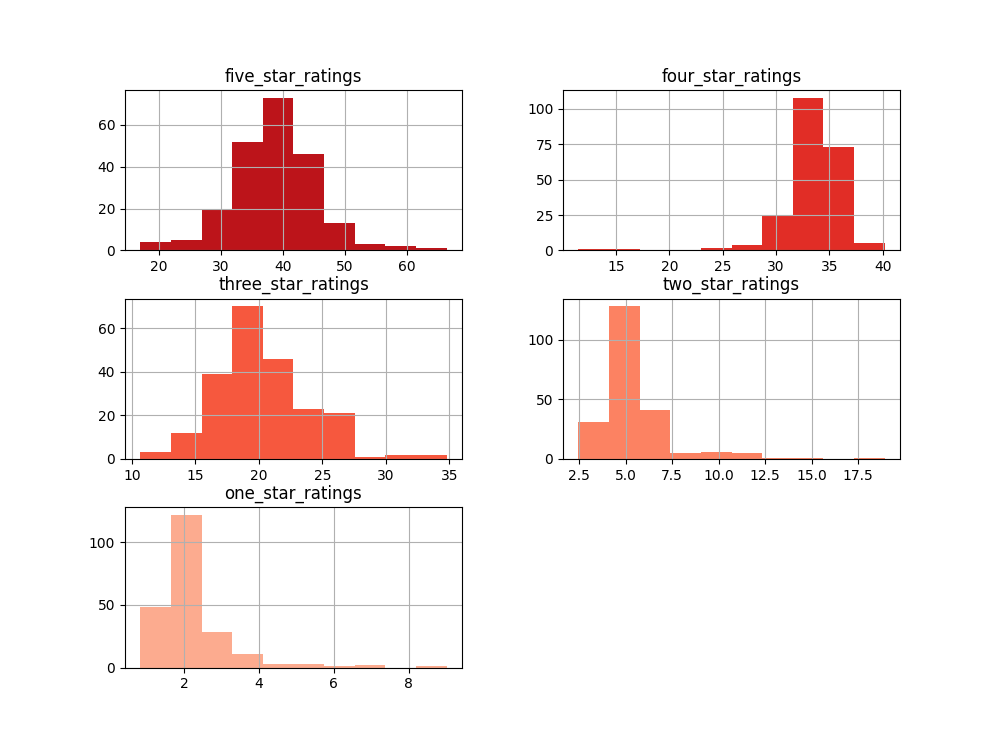

In [144]:
# гистограммы с цикличной сменой цвета
feat = [f for f in df.columns if 'star' in f]
colors = cm.Reds(np.linspace(0.8, 0.3, len(feat)))
print(colors)
cycler = cycle(colors)

axes = df_ratings[feat].hist(figsize=(10, 7.5));
for ax in axes.flatten().tolist():
    c = next(cycler)
    for p in ax.patches:
        p.set_facecolor(c)

#### `pairplot`

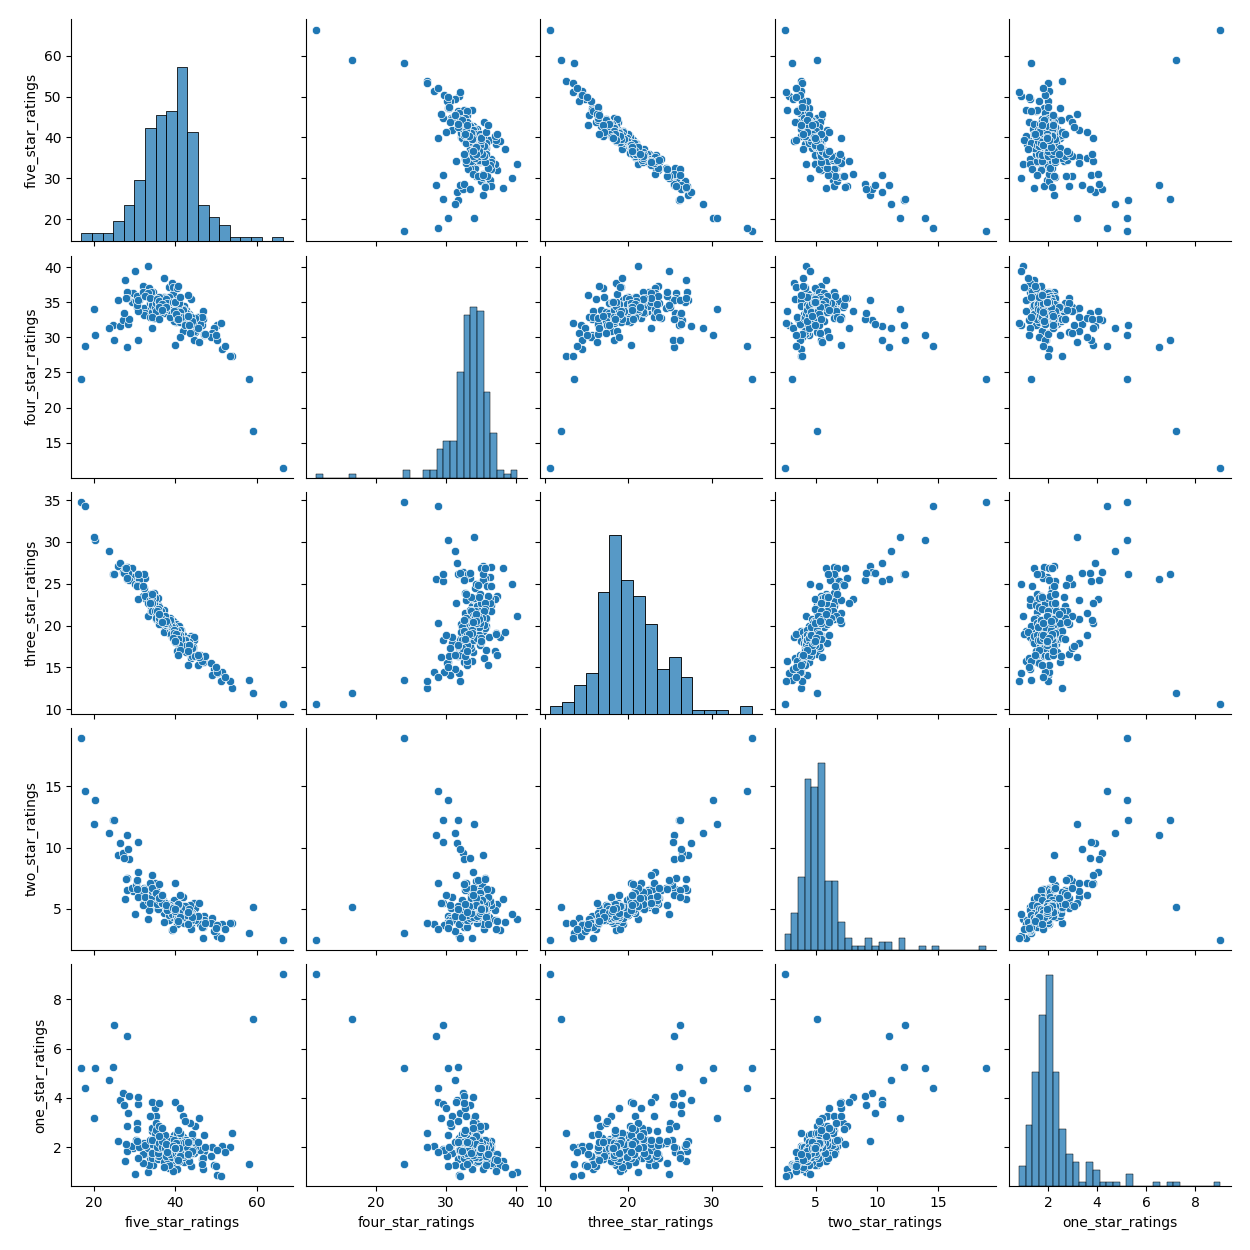

In [145]:
sns.pairplot(height=2.5, data=df_ratings[feat]);
plt.show()

#### Связь рейтинга книги с количеством страниц и количеством сиквелов

In [147]:
series_type_anno = [('Любая', 'All'), ('Отдельная', 'Standalone'),
                    ('Дилогия', 'Duology'), ('Трилогия', 'Trilogy'),
                    ('Цикл', 'Saga')]
series_type_dict = dict()
for t in series_type_anno:
    series_type_dict[t[1]] = t[0]

toggle = widgets.ToggleButtons(options=series_type_anno,
                               description='Цикличность:',
                               disabled=False,
                               button_style='',
                               tooltips=['Любое количество книг',
                                        'Отдельная книга',
                                        'Две книги в цикле',
                                        'Три книги в цикле',
                                        'Больше книг богу книг']
                                )
def making_pages(df, toggle, label):
    df_pages = df[df['number_of_pages'] <= 1500].copy()
    if not toggle == 'All':
        mask = [toggle in x for x in df_pages['series_type']]
        colour = 'rating_count'
    else:
        mask = [True for x in df_pages['series_type']]
        colour = 'series_type'
    title = f"Зависимость рейтинга от количества страниц для цикличности \"{label}\""
    fig = px.scatter(df_pages[mask],
                     x="number_of_pages",
                     y="rating_count",
                     labels = {"number_of_pages": 'Количество страниц', "rating_count": 'Количество оценок',
                               "review_count": 'Количество рецензий', "series_type": 'Цикличность'},
                     size='review_count',
                     color="review_count",
                     hover_data=['title', 'author'],
                     facet_col="series_type",
                     title = title
                    )
    # Меняем названия subplot'ов
    fig.for_each_annotation(lambda a: a.update(text = series_type_dict[a.text.split('=')[1]]))
    # Меняем названия рядов в легенде
    # fig.for_each_trace(lambda t: t.update(name = series_type_dict[t.name],
    #                                       legendgroup = series_type_dict[t.name],
    #                                       hovertemplate = t.hovertemplate.replace(t.name, series_type_dict[t.name.split('=')[1]])
    #                                      ) if t.name != '' else '')

    fig.layout.update(autosize=False,
                      width=1300,
                      height=400,
                      title_x = 0.5)
    fig.show()

    df_scat = df_pages[mask].groupby(['year_published', 'series_type']) \
        .agg({'average_rating' : 'mean',
              'rating_count' : 'sum',
              'review_count' : 'sum'}) \
        .reset_index()
    df_scat = df_scat[df_scat.year_published > 1950]
    title = f"Средняя оценка для цикличности \"{label}\" c 1950 по 2021 гг."
    fig = px.scatter(df_scat,
                     y="average_rating",
                     x="year_published",
                     labels = {"average_rating": 'Средняя оценка', "year_published": 'Год выхода', "series_type": 'Цикличность', "rating_count": 'Количество оценок'},
                     log_x=True,
                     log_y=True,
                     color=colour,
                     size="rating_count",
                     title = title)
    fig.layout.update(autosize=False,
                      width=1000,
                      height=400,
                      title_x = 0.5)
    fig.show()

In [148]:
interact(making_pages, toggle = toggle, label = toggle.label, df=fixed(df));

interactive(children=(ToggleButtons(description='Цикличность:', options=(('Любая', 'All'), ('Отдельная', 'Stan…

#### `heatmap`

In [149]:
df.corr()

ValueError: could not convert string to float: 'Inner Circle'

In [150]:
# фикс
# since pandas version 2.0.0 now you need to add numeric_only=True param to avoid the issue
# https://stackoverflow.com/a/76717659
df.corr(numeric_only=True)

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,year_published,books_in_series_count,awards_count
id,1.000000,-0.018870,0.055714,0.140992,-0.013166,-0.018841,-0.030453,-0.025056,-0.017077,-0.023812,0.250141,-0.051632,-0.010081
rating_count,-0.018870,1.000000,0.831896,0.033575,0.970995,0.986749,0.937906,0.854123,0.758821,0.031390,-0.040727,0.010896,0.362991
review_count,0.055714,0.831896,1.000000,0.024583,0.778147,0.853200,0.808335,0.737092,0.618566,0.041081,0.008871,-0.016929,0.478139
average_rating,0.140992,0.033575,0.024583,1.000000,0.056972,0.029730,-0.010951,-0.033353,-0.020523,0.146987,0.024327,0.165207,-0.008471
five_star_ratings,-0.013166,0.970995,0.778147,0.056972,1.000000,0.931121,0.829844,0.723096,0.652092,0.033541,-0.031668,0.017074,0.348821
four_star_ratings,-0.018841,0.986749,0.853200,0.029730,0.931121,1.000000,0.959334,0.862487,0.733489,0.031012,-0.042099,0.008962,0.368648
three_star_ratings,-0.030453,0.937906,0.808335,-0.010951,0.829844,0.959334,1.000000,0.958384,0.831717,0.022540,-0.054645,0.002224,0.339277
two_star_ratings,-0.025056,0.854123,0.737092,-0.033353,0.723096,0.862487,0.958384,1.000000,0.936248,0.020109,-0.049732,-0.009856,0.300122
one_star_ratings,-0.017077,0.758821,0.618566,-0.020523,0.652092,0.733489,0.831717,0.936248,1.000000,0.019594,-0.033319,-0.007701,0.257341
number_of_pages,-0.023812,0.031390,0.041081,0.146987,0.033541,0.031012,0.022540,0.020109,0.019594,1.000000,-0.025069,0.035776,0.034995


widget


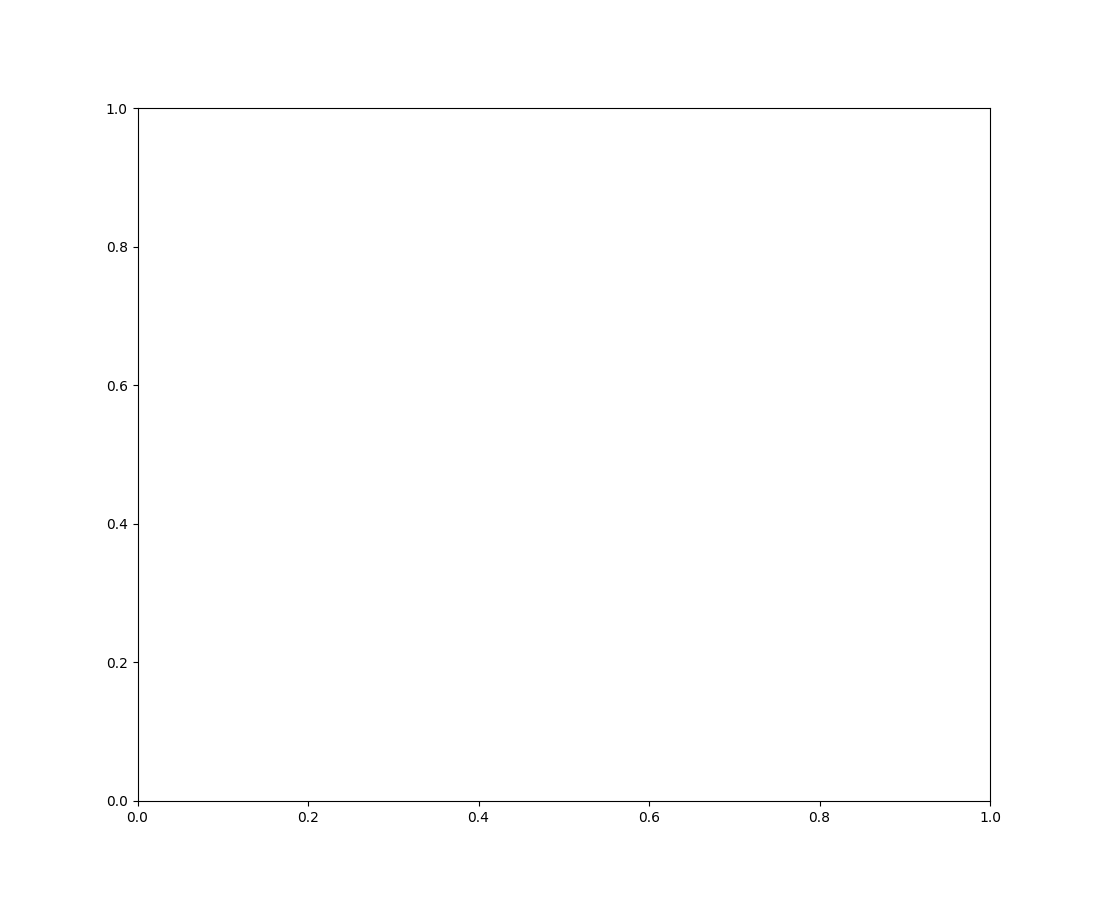

In [154]:
print(mpl.get_backend())

fig_sns, ax_sns = plt.subplots(figsize=(11, 9))
fig_sns.show()  # Странная ошибка без явного отображения fig_sns перед построением `sns.heatmap`
ax_sns = sns.heatmap(data = df[df.columns[~df.columns.isin(['id'])]].corr(numeric_only=True));
for item in ax_sns.get_xticklabels():
    item.set_rotation(30)
for item in ax_sns.get_yticklabels():
    item.set_rotation(30)
fig_sns.tight_layout()

> Далее косяк с кривым отображением графиков без явного предварительного рендера с `fig_sns.show()` повторяется. Возможно, это косячное сочетание версии `matplotlib`, версии `seaborn` и бэкенда рендера.  
> Подробнее про бэкенды: [Backends](https://matplotlib.org/stable/users/explain/figure/backends.html).

#### violinplot

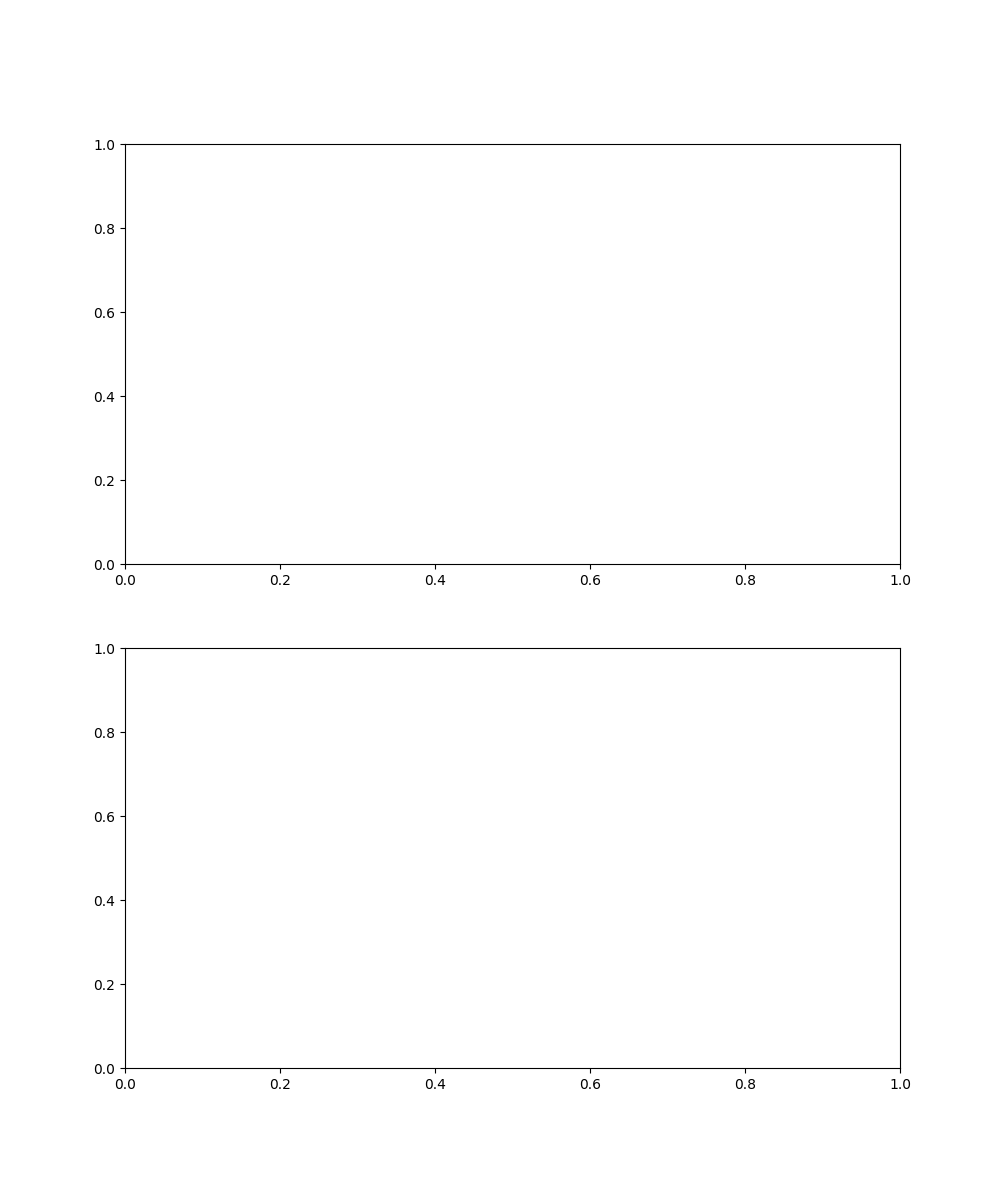

In [156]:
fig_sns, ax_sns = plt.subplots(2, 1, figsize=(10, 12))
fig_sns.show()
sns.violinplot(ax = ax_sns[0], data = df_pubs, x = 'publisher', y = 'average_rating', hue = 'publisher', palette = 'Spectral');
sns.boxplot(ax = ax_sns[1], data = df_pubs, x = 'publisher', y = 'average_rating', hue = 'publisher', palette = 'Spectral');
for ax in ax_sns:
    ax.tick_params(axis='x', rotation=30)
fig_sns.tight_layout()

#### QQ-график
Графики Q-Q (квантиль-квантиль) сравнивают два распределения вероятностей путем построения совместных квантилей. График Q-Q используется для сравнения форм распределений, обеспечивая графическое представление того, насколько подобны или различны положение, масштаб и асимметрия двух распределений.

С помощью него определяем насколько числовой признак похож на нормальное распределение. Поскольку целый ряд методов статистики предполагают, что распределение признака нормальное. QQ-график — один из способов проверить нормальность распределения.

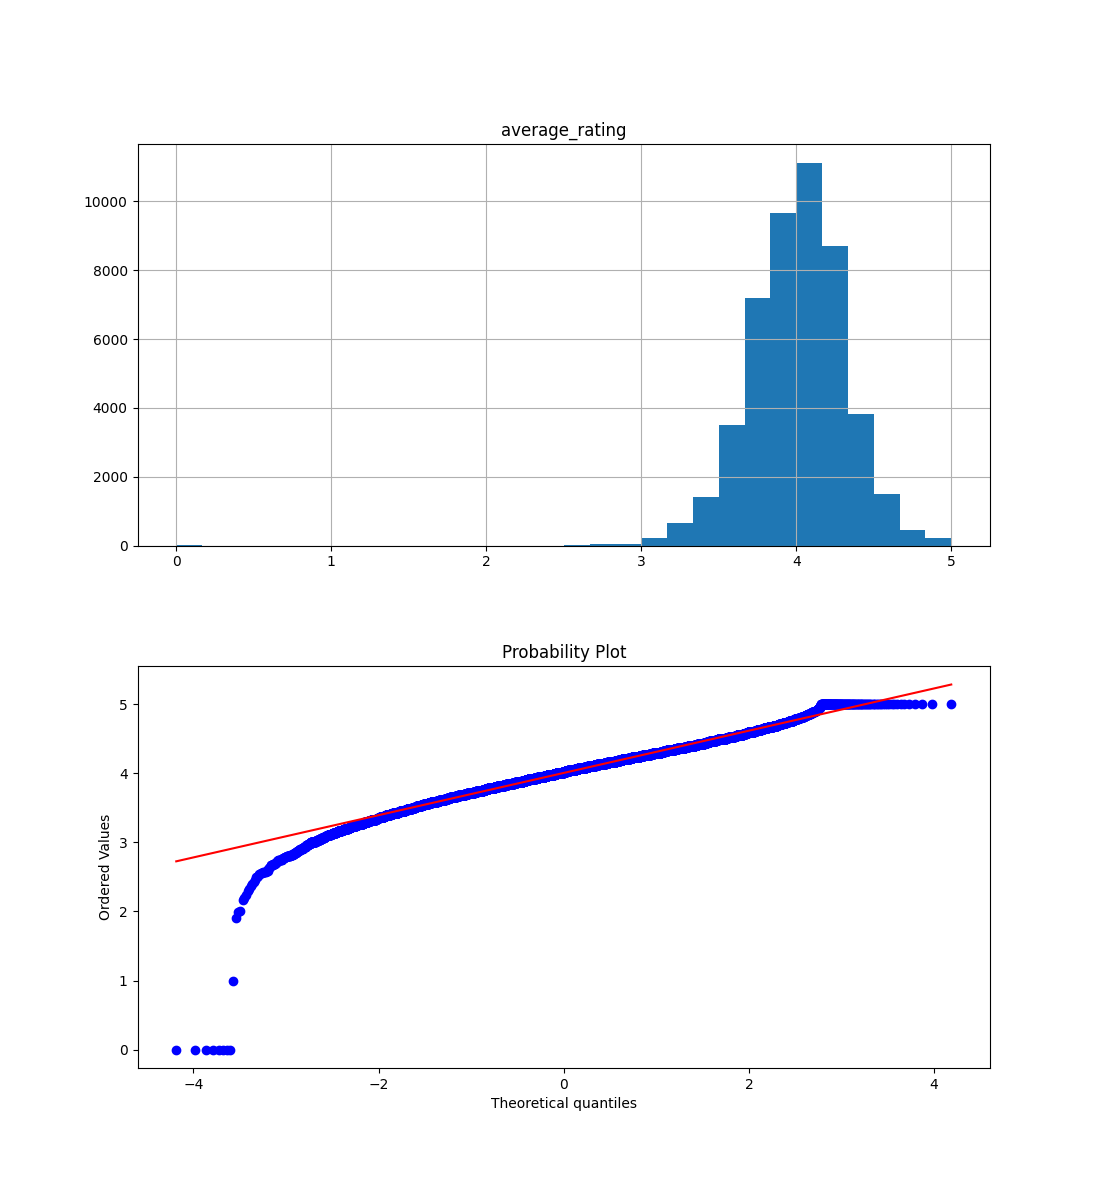

In [157]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(11, 12))
stats.probplot( df['average_rating'], dist="norm", plot=plt)
plt.subplot(2,1,2)
df.hist(ax = ax_p[0], column = 'average_rating', bins = 30 )
plt.show()

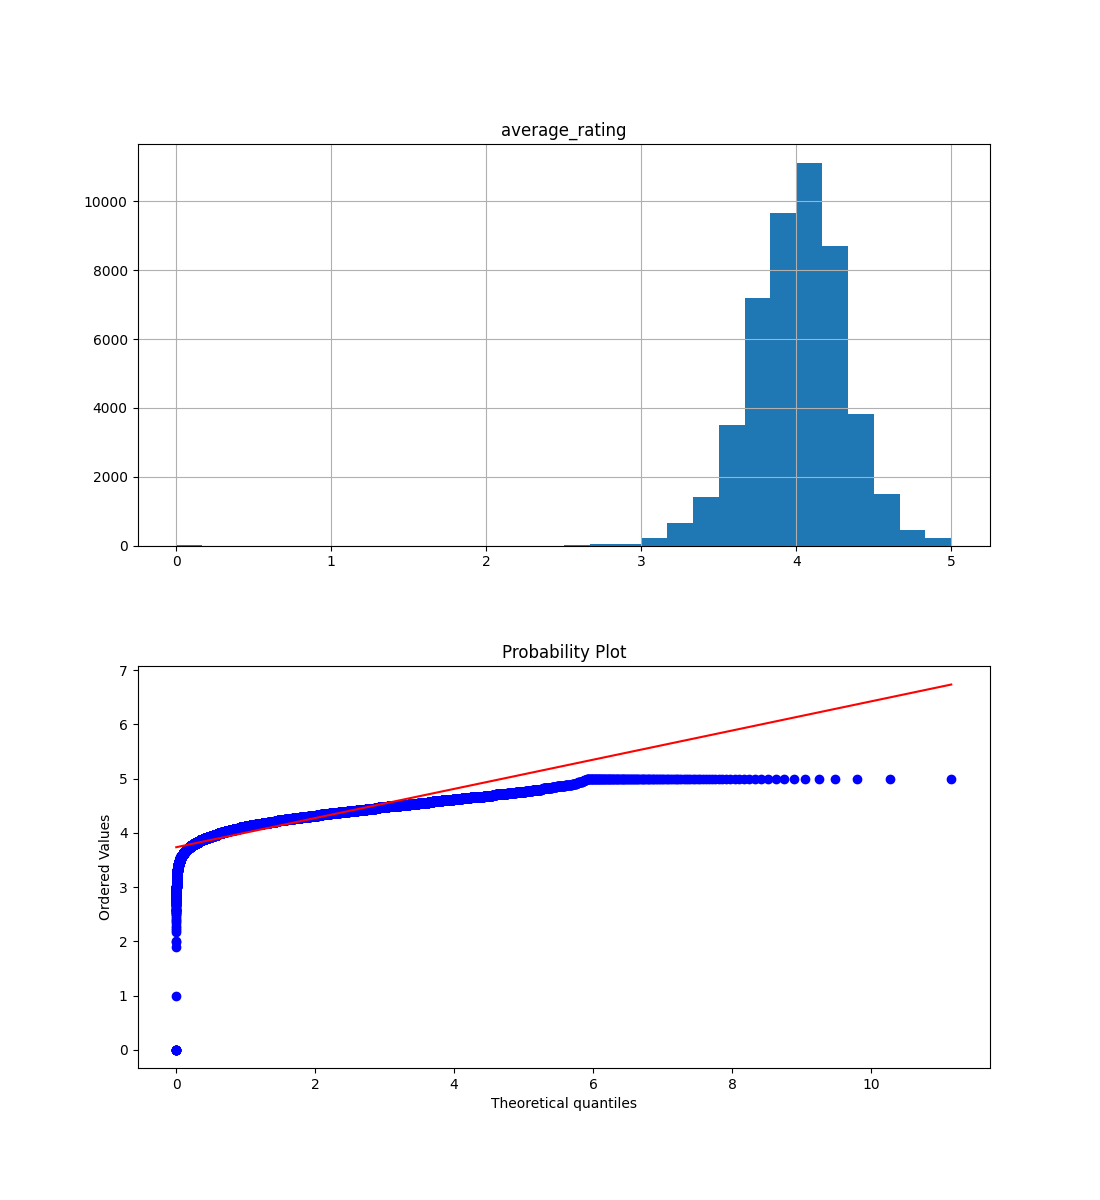

In [158]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(11, 12))
stats.probplot( df['average_rating'], dist=stats.expon, plot=plt)
plt.subplot(2,1,2)
df.hist(ax = ax_p[0], column = 'average_rating', bins = 30 )
plt.show()

# 1.12 Экспорт в растровый и векторный форматы
DPI - dots per inch - разрешение нашего рисунка, количество точек на дюйм. Пришло из полиграфии. "Физический" размер рисунка может оставаться таким же, а изменение `dpi` приведет к изменению размера рисунка на бумаге или в документе. 300 dpi достаточно для печати. Соответственно, комбинация `figsize=(w, h)` и `dpi=n` задает искомый размер (в документе размер рисунка можно поправить, и визуально качество не ухудшится, а вот на печати это скажется при апскейле) и разрешение (для печати и отображения).
Рисунки, содержащие графики, желательно экспортировать в векторный формат, чтобы не страдало качество печати.

#### matplotlib

In [159]:
# Сохранение в растровый формат, matplotlib
ipl.savefig(Path(data_path, 'ratings_by_year_300.png'), dpi=300)
ipl.savefig(Path(data_path, 'ratings_by_year_600.png'), dpi=600)

In [160]:
# Сохранение в векторный формат, matplotlib
ipl.savefig(Path(data_path, 'ratings_by_year.svg'), dpi=300)

#### plotly
В `plotly` нет явного параметра `dpi`, есть только размер в пикселах и параметр `scale`.
Необходимо установить пакет `kaleido`.

In [161]:
# Сохранение в растровый формат, plotly
import plotly
# plotly.io.kaleido.scope.mathjax=None
# fig_2.write_image(Path(data_path, 'top10_authors_and_genres.png'), format='png', engine='kaleido')
fig_2.write_image(Path(data_path, 'top10_authors_and_genres.png'), format='png')

In [162]:
# Сохранение в векторный формат, plotly
fig_2.write_image(Path(data_path, 'top10_authors_and_genres.svg'))

> В более старой версии `plotly` (&leq; 6.1.1) можно было выбрать движок рендера. Для экспорта в векторный формат использовался `kaleido`, но определенной версии, см. [Not able to save plotly plots using to_image or write_image](https://stackoverflow.com/questions/70997997/not-able-to-save-plotly-plots-using-to-image-or-write-image).
> 
> Рабочая версия:
> ```bash
> pip install kaleido==0.1.0post1
> ```
> &nbsp;  
> И код экспорта немного отличался:
> ```python
> import plotly
> plotly.io.kaleido.scope.mathjax=None
> fig_2.write_image(Path(data_path, 'top10_authors_and_genres.png'), format='png', engine='kaleido')
> ```  
> &nbsp;  
> В настоящее время `kaleido` используется в качестве основного движка, его API изменился. Некоторые сочетания версий `plotly` и `kaleido` не работали (Python 3.10).

In [163]:
!uv pip show kaleido

Name: kaleido
Version: 1.2.0
Location: C:\Users\UD\ait-ds\Lib\site-packages
Requires: choreographer, logistro, orjson, packaging, pytest-timeout
Required-by:


Using Python 3.14.3 environment at: C:\Users\UD\ait-ds


### 1.13 `plotly` `Dash`

- [A Minimal Dash App](https://dash.plotly.com/minimal-app)
- [Dash in Jupyter Environments](https://dash.plotly.com/dash-in-jupyter)
- [Dash Example Index]()

`Dash` &ndash; библиотека для создания интерактивных веб-приложений и дашбордов.

#### Интерактивный график 1.8 с использованием `Dash`

In [164]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H2(
            "Средний пользовательский рейтинг",
            style={
                'text-align': 'center',
                'font-family': 'Ink Free'
            }
        ),
        
        html.Div(
            [
                html.Br(),
                dcc.Checklist(
                    id="toggle-rangeslider",
                    options=[{"label": " Слайдер «Год выхода»", "value": "slider"}],
                    value=["slider"],
                    style={
                        'font-family': 'Tiger Expert',
                        'font-weight': 'bold',
                        'text-align': 'left'
                    }
                ),
                html.Br(),
                dcc.Graph(
                    id="graph",
                    style={
                        'font-weight': 'bold',
                        'font-size': '24'
                    }
                )
            ],
            style={
                "display": "flex", 
                'align-items': 'left',
                'flex-direction': 'column'
            }
        ),
    ], style={
        'background-color': 'rgba(180, 180, 180, 0.5)',
        'display': 'flex',
        'align-items': 'center',
        'flex-direction': 'column'
    }
)


@app.callback(
    Output("graph", "figure"),
    Input("toggle-rangeslider", "value"),
)
def display_scatter(value):
    fig_1 = go.Figure()

    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.five_star_ratings), name = '★★★★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.four_star_ratings), name = '★★★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.three_star_ratings), name = '★★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.two_star_ratings),name = '★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.one_star_ratings), name = '★'))

    # Set title
    fig_1.update_layout(
        # title_text="Средний пользовательский рейтинг",
        title_x=0.5,
        legend_title="Рейтинг",
        legend = dict(orientation = "v", y = .5, x = 1.025),
        font_family = 'Ink Free'
    )

    # Add range slider
    fig_1.update_layout(
        xaxis = dict(
            rangeselector = dict(
                buttons = list([
                    dict(count = 21,
                         label = "21y",
                         step = "year",
                         stepmode = "backward"),
                    dict(count = 100,
                         label = "100y",
                         step = "year",
                         stepmode = "backward"),
                    dict(step = "all")
                ])
            ),
            rangeslider = dict(
                visible = "slider" in value
            ),
            type = "date"
        ),
        autosize=False,
        width=1000,
        height=800,
    )

    return  fig_1


if __name__ == "__main__":
    app.run(debug=True, mode='jupyterlab')